## Lead Score Case Study

#### Problem Statement :

X Education is an education company which sells its courses online. Any professional can land on their website and browse for courses offered.
The company markets its courses on several websites and search engines like Google and other social media platform advertisements. When landed on company's website, the user can watch videos or provide their contact details by filling up the forms.
Once the form is filled by user, they are classified as leads. The company also gets leads from past referrals. Once acquiring the leads, the company's aim is to convert the leads into customers.
The problem faced by company is that the conversion rate is very poor i.e. only 30%.

The company wants :

- to help them find most potential leads so that the sales team can focus on these leads instead of making calls to everyone in turn increasing the conversion rate to approx 80%.

#### Objective :

- Build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.



### Importing and Understanding Data

In [2161]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2162]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2163]:
# Importing dataset
leads_data = pd.read_csv("Leads.csv")
# Check head of the dataset
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2164]:
#Inspect the various aspects of the Leads dataframe

start = "\033[1m"
end = "\033[0;0m"
print("\n"+start+"Datatype of each Column"+end+"\n")
print(leads_data.info()) # Datatype of each Column
print("\n"+start+"Summary of operations on numeric columns in dataframe"+end+"\n")
print(leads_data.describe()) # Summary of operations on numeric columns in dataframe
print("\n"+start+"Name of the type of collection"+end+"\n")
print(type(leads_data)) # Returns the name of the type of collection
print("\n"+start+"Number rows and columns"+end+"\n")
print(leads_data.shape) # Returns number rows and columns 
print("\n"+start+"Columns present in Dataframe"+end+"\n")
print(leads_data.columns) # Returns the Columns present in Dataframe
print("\n"+start+"Numpy array of nested list of values"+end+"\n")
print(leads_data.values) # Returns the numpy array of nested list of values


# storing the original number of rows in data frame, to be used later

initial_row_count = len(leads_data.index)


Datatype of each Column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization              

### Data Cleaning

In [2165]:
# Removing duplicate rows if any

leads_data.drop_duplicates(inplace=True)

##### Replacing 'Select' level with nan in categorical variables

We will identify and replace the "select" level wihtin the categorical features with nan/null because, select value will not help in identifying any pattern. It is as good as a null value.

In [2166]:
# Replacing the select level in 'Specialization'

leads_data['Specialization'][leads_data['Specialization']=='Select']=np.nan

# Replacing the select level in 'How did you hear about X Education'

leads_data['How did you hear about X Education'][leads_data['How did you hear about X Education']=='Select']=np.nan

# Replacing the select level in 'Lead Profile'

leads_data['Lead Profile'][leads_data['Lead Profile']=='Select']=np.nan

# Replacing the select level in 'City'

leads_data['City'][leads_data['City']=='Select']=np.nan


###### Dropping the unnecessary columns

We will drop the columns <b>Lead Quality,Tags,Lead Profile,Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score</b>

The reason for dropping the above columns is that these column values are obtained only after the customer is contacted by sales team and not before that. Since, this data will not be present with us before the lead is contacted, these columns will not beneficial. However, if they are included while building the model, the model can come out very good but it will be irrelevant to the purpose.

In [2167]:
# Irrelevant columns
columns = ['Lead Quality','Tags','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']

# dropping the irrelevant columns
leads_data.drop(columns,axis=1,inplace=True)

# checking the remaining columns
leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [2168]:
# We can drop one of the columns between Last Activity and Last Notable Activity as they are higly correlated.

# We will keep Last Notable Activity as it has more concentrated and segregated data

leads_data.drop('Last Activity',axis=1,inplace=True)

###### Dropping the columns with high % of missing values

In [2169]:
# Finding the % of Missing values in each column

round((100*(leads_data.isnull().sum())/len(leads_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### We Will drop the columns having >40% missing values

We saw that the column which has >40% missing values is only one i.e. 'How did you hear about X Education'. So, we will drop this column.

In [2170]:
# dropping column with high % of missing value
leads_data.drop('How did you hear about X Education',axis=1,inplace=True)

###### Checking the data distribution in Categorical variables

We will check the distribution of data within the categories of each categorical variable.

- Then we can remove the columns with high skewness.

- And treat the categories of variables having very less % compared to other categories within it.

In [2171]:
start = "\033[1m"
end = "\033[0;0m"

# Data distribution of Lead Origin
print("\n"+start+"Data distribution of Lead Origin"+end+"\n")
print((leads_data['Lead Origin'].value_counts()/len(leads_data.index)) *100)

# Data distribution of Lead Source
print("\n"+start+"Data distribution of Lead Source"+end+"\n")
print((leads_data['Lead Source'].value_counts()/len(leads_data.index)) *100)

# Data distribution of Do Not Email
print("\n"+start+"Data distribution of Do Not Email"+end+"\n")
print((leads_data['Do Not Email'].value_counts()/len(leads_data.index)) *100)

# Data distribution of Do Not Call
print("\n"+start+"Data distribution of Do Not Call"+end+"\n")
print((leads_data['Do Not Call'].value_counts()/len(leads_data.index)) *100)

# Data distribution of Country
print("\n"+start+"Data distribution of Country"+end+"\n")
print((leads_data['Country'].value_counts()/len(leads_data.index)) *100)

# Data distribution of Specialization
print("\n"+start+"Data distribution of Specialization"+end+"\n")
print((leads_data['Specialization'].value_counts()/len(leads_data.index)) *100)

# Data distribution of What is your current occupation
print("\n"+start+"Data distribution of What is your current occupation"+end+"\n")
print((leads_data['What is your current occupation'].value_counts()/len(leads_data.index)) *100)

# Data distribution of What matters most to you in choosing this course
print("\n"+start+"Data distribution of What matters most to you in choosing a course"+end+"\n")
print((leads_data['What matters most to you in choosing a course'].value_counts()/len(leads_data.index)) *100)

# Data distribution of Search
print("\n"+start+"Data distribution of Search"+end+"\n")
print((leads_data['Search'].value_counts()/len(leads_data.index)) *100)

# Data distribution of Magazine
print("\n"+start+"Data distribution of Magazine"+end+"\n")
print((leads_data['Magazine'].value_counts()/len(leads_data.index)) *100)

# Data distribution of Newspaper Article
print("\n"+start+"Data distribution of Newspaper Article"+end+"\n")
print((leads_data['Newspaper Article'].value_counts()/len(leads_data.index)) *100)

# Data distribution of X Education Forums
print("\n"+start+"Data distribution of X Education Forums"+end+"\n")
print((leads_data['X Education Forums'].value_counts()/len(leads_data.index)) *100)

# Data distribution of Newspaper
print("\n"+start+"Data distribution of Newspaper"+end+"\n")
print((leads_data['Newspaper'].value_counts()/len(leads_data.index)) *100)

# Data distribution of Digital Advertisement
print("\n"+start+"Data distribution of Digital Advertisement"+end+"\n")
print((leads_data['Digital Advertisement'].value_counts()/len(leads_data.index)) *100)

# Data distribution of Through Recommendations
print("\n"+start+"Data distribution of Through Recommendations"+end+"\n")
print((leads_data['Through Recommendations'].value_counts()/len(leads_data.index)) *100)

# Data distribution of Receive More Updates About Our Courses
print("\n"+start+"Data distribution of Receive More Updates About Our Courses"+end+"\n")
print((leads_data['Receive More Updates About Our Courses'].value_counts()/len(leads_data.index)) *100)

# Data distribution of Update me on Supply Chain Content
print("\n"+start+"Data distribution of Update me on Supply Chain Content"+end+"\n")
print((leads_data['Update me on Supply Chain Content'].value_counts()/len(leads_data.index)) *100)

# Data distribution of Get updates on DM Content
print("\n"+start+"Data distribution of Get updates on DM Content"+end+"\n")
print((leads_data['Get updates on DM Content'].value_counts()/len(leads_data.index)) *100)

# Data distribution of City
print("\n"+start+"Data distribution of City"+end+"\n")
print((leads_data['City'].value_counts()/len(leads_data.index)) *100)

# Data distribution of I agree to pay the amount through cheque
print("\n"+start+"Data distribution of I agree to pay the amount through cheque"+end+"\n")
print((leads_data['I agree to pay the amount through cheque'].value_counts()/len(leads_data.index)) *100)

# Data distribution of A free copy of Mastering The Interview
print("\n"+start+"Data distribution of A free copy of Mastering The Interview"+end+"\n")
print((leads_data['A free copy of Mastering The Interview'].value_counts()/len(leads_data.index)) *100)

# Data distribution of Last Notable Activity
print("\n"+start+"Data distribution of Last Notable Activity"+end+"\n")
print((leads_data['Last Notable Activity'].value_counts()/len(leads_data.index)) *100)


Data distribution of Lead Origin

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

Data distribution of Lead Source

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Live Chat             0.021645
Social Media          0.021645
Press_Release         0.021645
NC_EDM                0.010823
WeLearn               0.010823
welearnblog_Home      0.010823
blog                  0.010823
testone               0.010823
youtubechannel        0.010823
Pay per Click Ads     0.010823
Name: Lead Source, dtype: float64

Data distribution of Do N

###### Remove the highly skewed categorical columns

Now that we have checked the data distribution of categorical columns, we have come to know that the columns : <b>Do Not Call, Do Not Email, Country, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper,Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque</b> are highly skewed. And hence, they are not capable of giving any insights. So, it is better to remove these columns.

In [2172]:
# Skewed columns
columns = ['Do Not Call', 'Do Not Email', 'Country', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

# dropping the identified skewed columns
leads_data.drop(columns,axis=1,inplace=True)
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,NaN,Unemployed,NaN,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,NaN,Unemployed,NaN,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,NaN,Unemployed,Mumbai,No,Modified


##### Imputing the missing values with appropriate values of the columns

We have two options while imputing the values for the columns with missing values.
- Those with percent 20 or more, we can cap them in another category as 'missing' for that particular column
- Those with very less %, we can impute the mode

In [2173]:
# Checking the null percentage in remaining columns to come to decide imputing values

round((100*(leads_data.isnull().sum())/len(leads_data.index)),2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Specialization                            36.58
What is your current occupation           29.11
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

So, from above data, we can make 'missing' category for <b>Specialization, What is your current occupation,City</b>

And, for <b>Lead Source, TotalVisits, Page Views Per Visit</b> we can impute mode.

In [2174]:
# Making 'missing' category for Specialization 

leads_data['Specialization'][leads_data.Specialization.isnull()]='Missing'

# Making 'missing' category for What is your current occupation 

leads_data['What is your current occupation'][leads_data['What is your current occupation'].isnull()]='Missing'

# Making 'missing' category for City 

leads_data['City'][leads_data.City.isnull()]='Missing'

In [2175]:
# Imputing mode for missing values in Lead Source

leads_data['Lead Source'].fillna(leads_data['Lead Source'].mode()[0], inplace=True)

# Imputing mode for missing values in TotalVisits

leads_data['TotalVisits'].fillna(leads_data['TotalVisits'].median(), inplace=True)

# Imputing mode for missing values in Page Views Per Visit

leads_data['Page Views Per Visit'].fillna(leads_data['Page Views Per Visit'].median(), inplace=True)

In [2176]:
# Checking null percent again :

round((100*(leads_data.isnull().sum())/len(leads_data.index)),2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

After imputing the values, we can see that there are no null values remaining.

###### Treating the columns with imbalanced data distribution among its categories

From data distribution, we saw that the columns : <b>Lead Origin, Lead Source, Specialization, What is your current occupation, City, Last Notable Activity</b> are having lot of columns with small percentages. We can treat these columns by categorising the small percent categories as others.

In [2177]:
# for Lead Origin, we can group the values less than 10% to one value i.e. 'Others'

leads_data['Lead Origin'] = leads_data['Lead Origin'].replace(['Lead Add Form','Lead Import','Quick Add Form'],'Others')

(leads_data['Lead Origin'].value_counts()/len(leads_data.index)) *100

Landing Page Submission    52.878788
API                        38.744589
Others                      8.376623
Name: Lead Origin, dtype: float64

In [2178]:
# for Lead Source, we can group the values less than 2% to one value i.e. 'Others'

leads_data['Lead Source'] = leads_data['Lead Source'].replace(['Welingak Website','Referral Sites','Facebook','bing','google','Click2call','Live Chat','Social Media','Press_Release','NC_EDM','WeLearn','welearnblog_Home','blog','testone','youtubechannel','Pay per Click Ads'],'Others')

(leads_data['Lead Source'].value_counts()/len(leads_data.index)) *100

Google            31.428571
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Reference          5.779221
Others             3.787879
Name: Lead Source, dtype: float64

In [2179]:
# for Specialization, we can group the values less than 2% to one value i.e. 'Others'

leads_data['Specialization'] = leads_data['Specialization'].replace(['International Business','Healthcare Management','Hospitality Management','E-COMMERCE','Retail Management','Rural and Agribusiness','E-Business','Services Excellence'],'Others')

(leads_data['Specialization'].value_counts()/len(leads_data.index)) *100

Missing                              36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Others                                9.015152
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
Name: Specialization, dtype: float64

In [2180]:
# for What is your current occupation, we can group the values less than 10% to one value i.e. 'Others'

leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Others')

(leads_data['What is your current occupation'].value_counts()/len(leads_data.index)) *100

Unemployed              60.606061
Missing                 29.112554
Working Professional     7.640693
Student                  2.272727
Others                   0.367965
Name: What is your current occupation, dtype: float64

In [2181]:
# for City, we can group the values of other cities except Maharashtra related as 'Others'

leads_data['City'] = leads_data['City'].replace(['Other Cities','Other Metro Cities','Tier II Cities'],'Others')

(leads_data['City'].value_counts()/len(leads_data.index)) *100

Missing                        39.707792
Mumbai                         34.870130
Others                         12.337662
Thane & Outskirts               8.138528
Other Cities of Maharashtra     4.945887
Name: City, dtype: float64

In [2182]:
# for Last Notable Activity, we can group the values less than 4% to one value i.e. 'Others'

leads_data['Last Notable Activity'] = leads_data['Last Notable Activity'].replace(['Olark Chat Conversation','Email Link Clicked','Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Approached upfront','Form Submitted on Website','Resubscribed to emails','View in browser link Clicked','Email Received'],'Others')

(leads_data['Last Notable Activity'].value_counts()/len(leads_data.index)) *100

Modified                   36.872294
Email Opened               30.595238
SMS Sent                   23.506494
Others                      5.584416
Page Visited on Website     3.441558
Name: Last Notable Activity, dtype: float64

##### Dropping the rows with high % of missing values

In [2183]:
# For row-wise null count
round((100*(leads_data.isnull().sum(axis=1))/len(leads_data.columns)),2)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9235    0.0
9236    0.0
9237    0.0
9238    0.0
9239    0.0
Length: 9240, dtype: float64

Since we have imputed the columns with missing value, we do not have any rows with missing values. And hence we can proceed without dropping any rows.

##### Checking the percentage of rows retained

In [2184]:
# Checking the percentage of rows retained 

print("Final percentage of rows retained : ")
print(100*len(leads_data.index)/initial_row_count)

Final percentage of rows retained : 
100.0


### Data Visualisation

###### Categorical univariate analysis

Checking the bar graph for below columns.
- Lead Origin
- Lead Source
- Specialization
- What is your current occupation
- Last Notable Activity
- City
- Converted
- A free copy of Mastering The Interview

###### `Bar Plot`

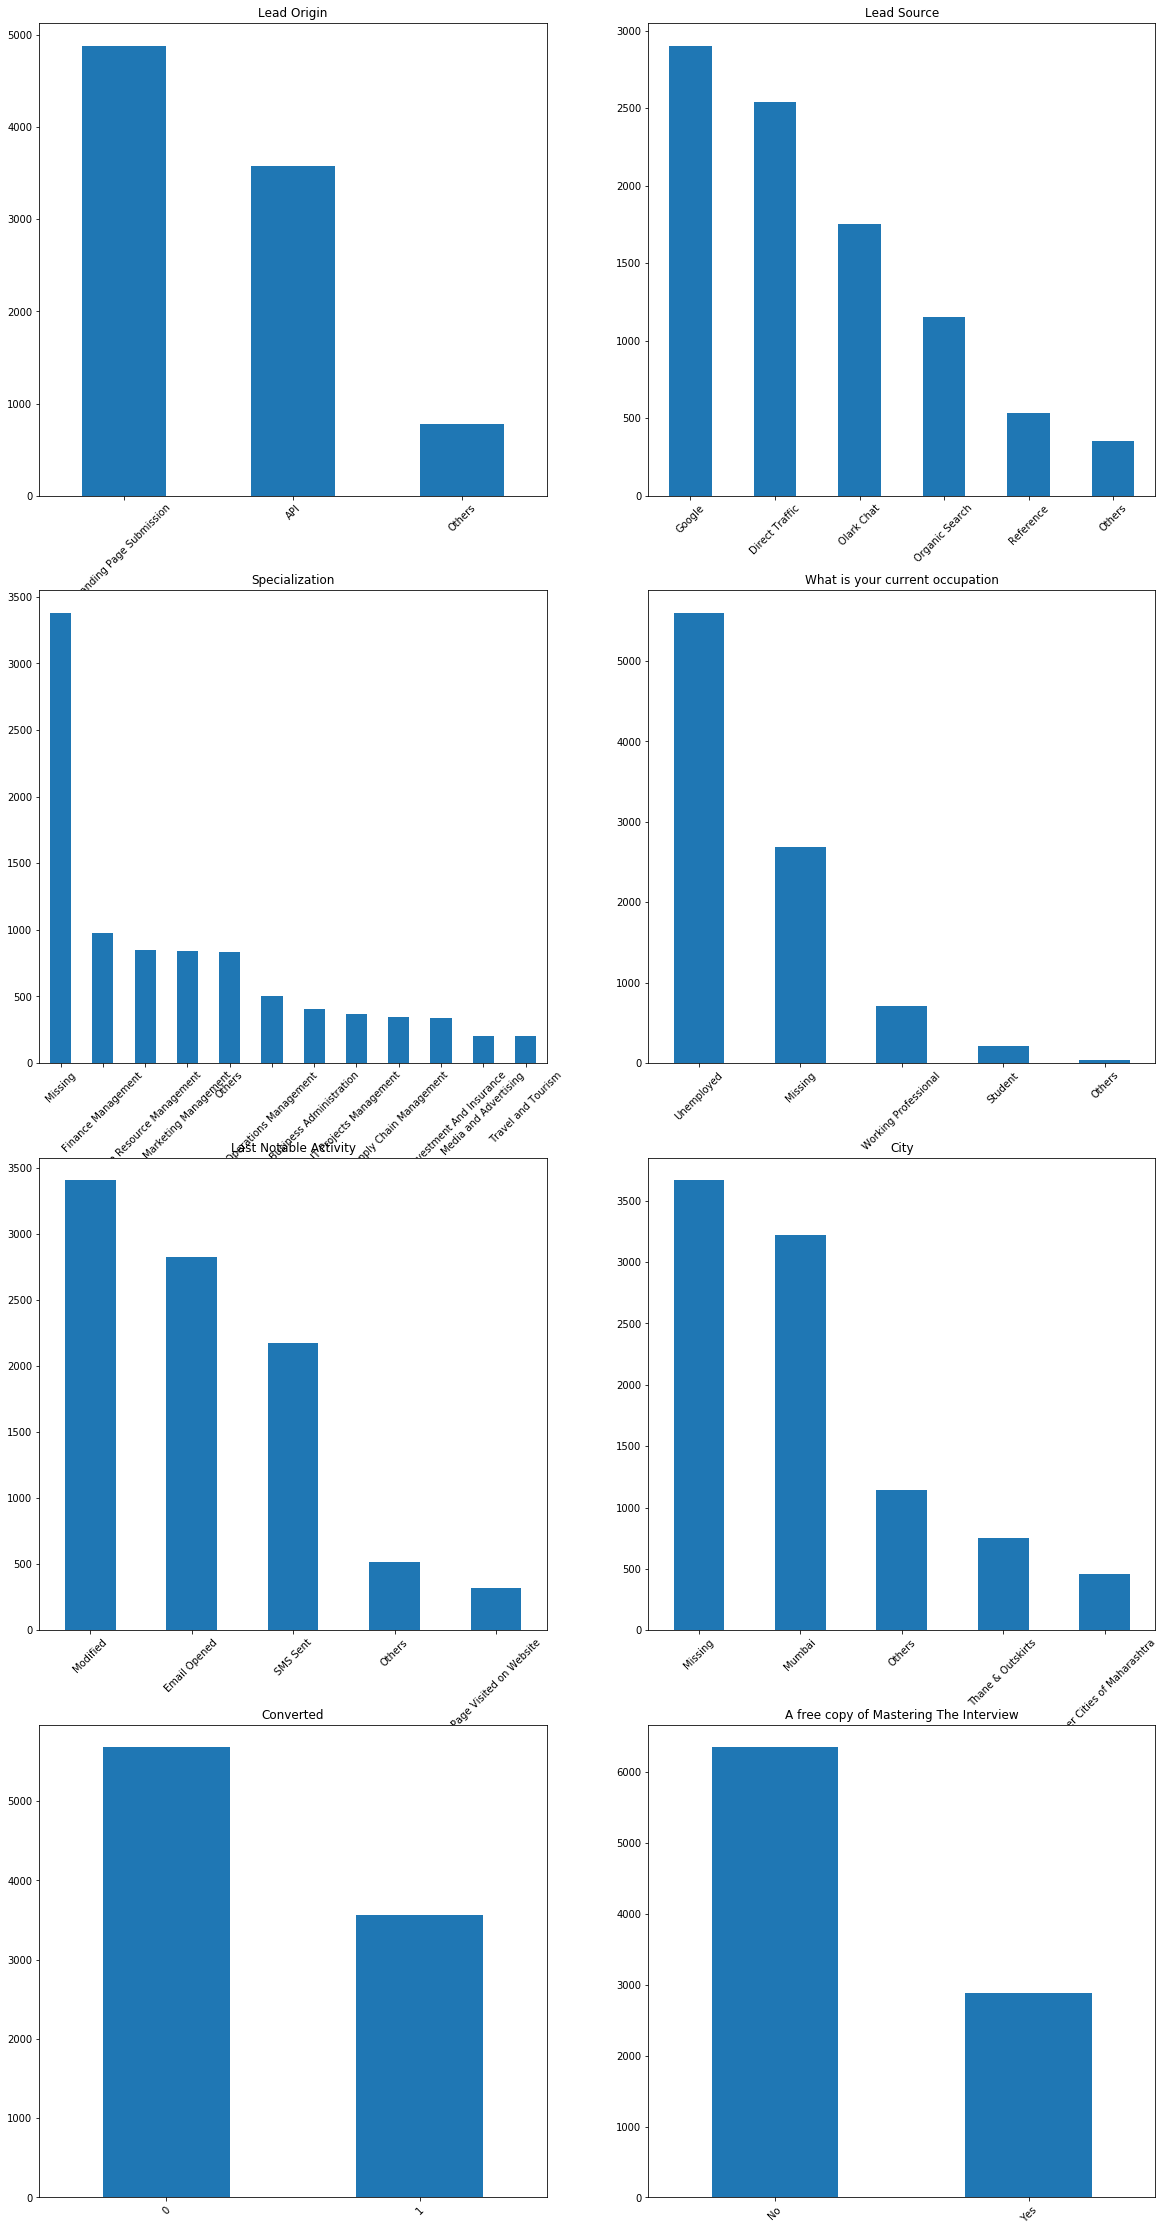

In [2185]:
# Plotting bar plots

plt.figure(figsize = (20,40))
features = ['Lead Origin','Lead Source','Specialization','What is your current occupation','Last Notable Activity','City','Converted','A free copy of Mastering The Interview']
for i in enumerate(features):
    plt.subplot(4,2,i[0]+1)
    leads_data[i[1]].value_counts().plot(kind='bar')
    plt.xticks(Rotation='45')
    plt.title(i[1])

So, after viewing the bar plots of the variables, we can draw following inferences : 

- <b>Lead Origin</b>: The 'Landing Page Submission' has highest leads while the 'Others' have the least.
- <b>Lead Source</b>: The 'Google' has highest leads while the 'Others' have the least
- <b>Specialization</b>: The leads who have not specified the Specialization has more frequency and those with 'Media and Advertising' have the least
- <b>Current Occupation</b>: The leads who have specified their current occupation as 'unemployed' are highest and 'others' category are very less
- <b>Last Notable Activity</b>: People who have 'modified' their details as the last activity have higher frequency and those who have visited the page on website have the least.
- <b>City</b>: The leads with 'missing' information on City have more frequency and the leads from 'other cities of Maharashtra' have the least.
- <b>Converted</b>: Non converted leads are higher than the converted ones.
- <b>Mastering the nterview Copy</b>: More leads have not opted for a free copy of Mastering the Interview.


##### Numerical univariate analysis

###### `Density Plot`

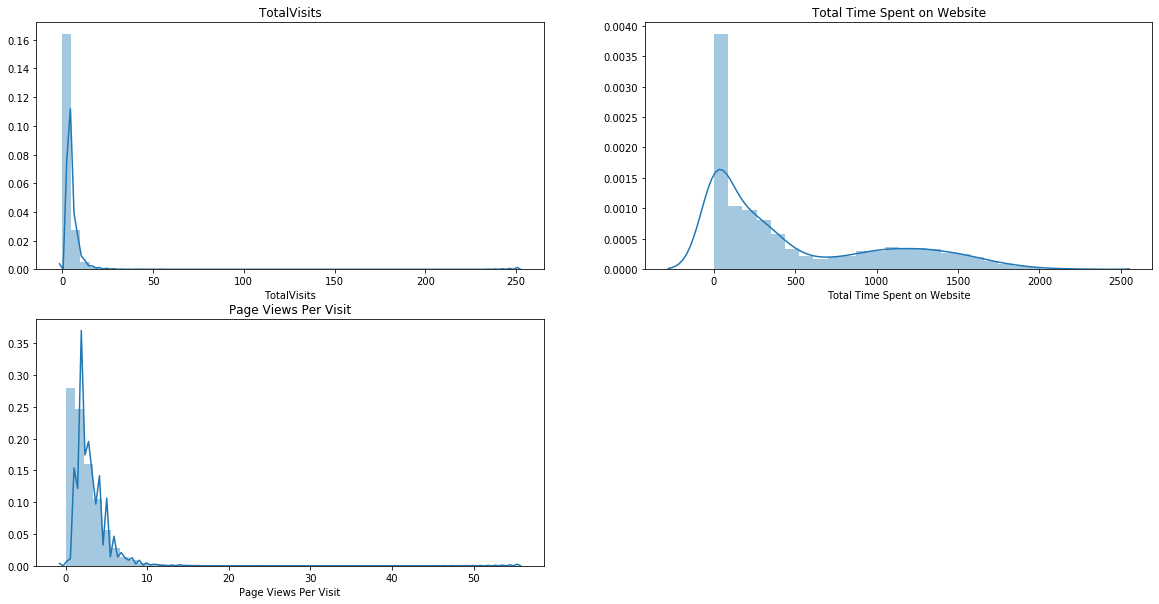

In [2187]:
# figure size
plt.figure(figsize=(20,10))

# plot the density plot of percentage 'TotalVisits' categories
plt.subplot(2, 2, 1)
plt.title('TotalVisits')
sns.distplot(leads_data['TotalVisits'], hist = True)

#plot the density plot of percentage 'Total Time Spent on Website' categories
plt.subplot(2, 2, 2)
plt.title('Total Time Spent on Website')
sns.distplot(leads_data['Total Time Spent on Website'], hist = True)


#plot the density plot of percentage 'Page Views Per Visit' categories
plt.subplot(2, 2, 3)
plt.title('Page Views Per Visit')
sns.distplot(leads_data['Page Views Per Visit'], hist = True)


plt.show()


The data in all the plots are not showing any normal distribution. And the plots of 'TotalVisits' and 'Page Views Per Visit' show extreme right trails which can be an indication of presence of extreme outliers.

###### Bivariate analysis on Numerical- Numerical variables.

###### `Correlation matrix`

In [2188]:
# Checking correlation between the variables
corr = leads_data.corr()
corr = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_day = corr.unstack().reset_index()
corr_day.columns=['Variable1','Variable2','Correlation']
corr_day.dropna(subset=['Correlation'],inplace=True)
corr_day.Correlation = round(abs(corr_day['Correlation']),4)
corr_day.sort_values(by='Correlation', ascending=False)

,Variable1,Variable2,Correlation
22,Page Views Per Visit,TotalVisits,0.5122
16,Total Time Spent on Website,Converted,0.3625
23,Page Views Per Visit,Total Time Spent on Website,0.3143
17,Total Time Spent on Website,TotalVisits,0.2173
20,Page Views Per Visit,Lead Number,0.0570
11,TotalVisits,Converted,0.0291
5,Converted,Lead Number,0.0252
10,TotalVisits,Lead Number,0.0214
15,Total Time Spent on Website,Lead Number,0.0203
21,Page Views Per Visit,Converted,0.0051


We can see that the variables <b>'Page Views Per Visist' and 'Total Visits'</b> have highest correlation and variables <b>'Page Views Per Visit' and 'Converted'</b> have the least correlation.

It doesn't imply the causation.
We can also observe that target variable <b>'Converted' has highest correlation with 'Total Time Spent on Website'</b>

###### `Heat Map`

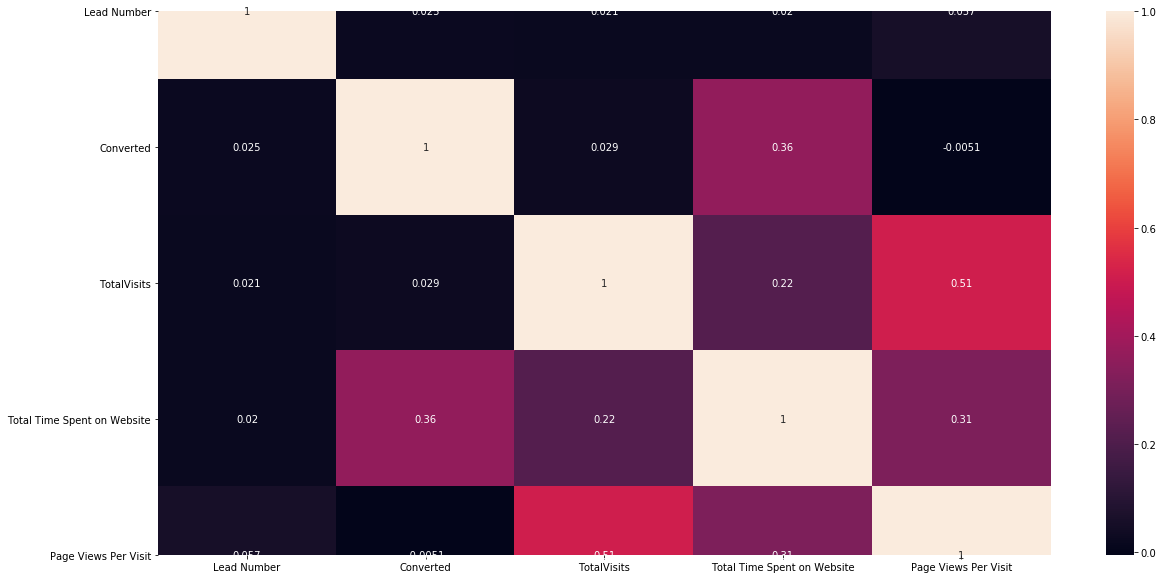

In [2189]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads_data.corr(),annot = True)
plt.show()

The correlation values calculated and observed can be picturised from the above heat map.

###### `Pair Plot`

We can see the variance of other numerical variables with respect to target variable 'Converted'

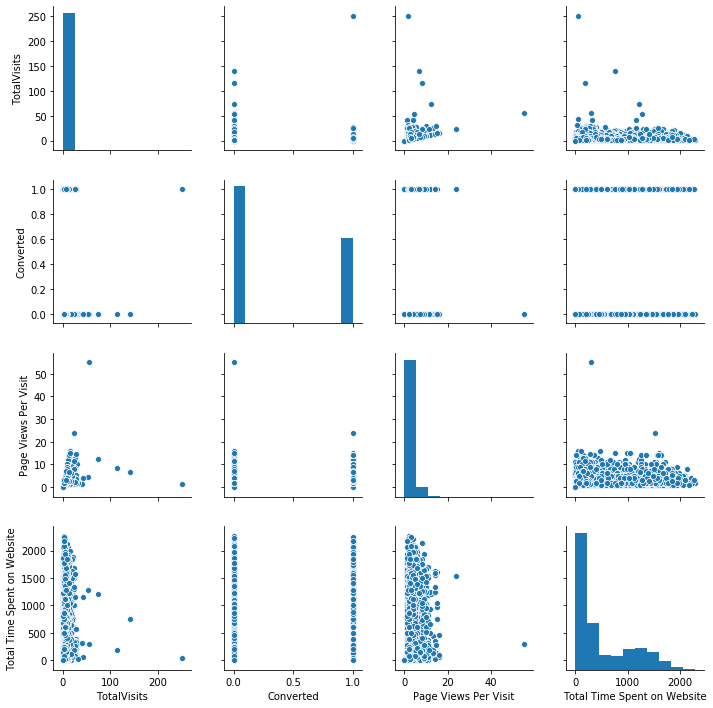

In [2190]:
# Pair plot
sns.pairplot(leads_data[['TotalVisits','Converted','Page Views Per Visit','Total Time Spent on Website']])

From the above pair plot, we can say that none of the variables are not linear to each other. 

###### Categorical-Categorical bivariate analysis

###### `Count PLot`

We can see the variance in the categories of Categorical Column w.r.t Converted

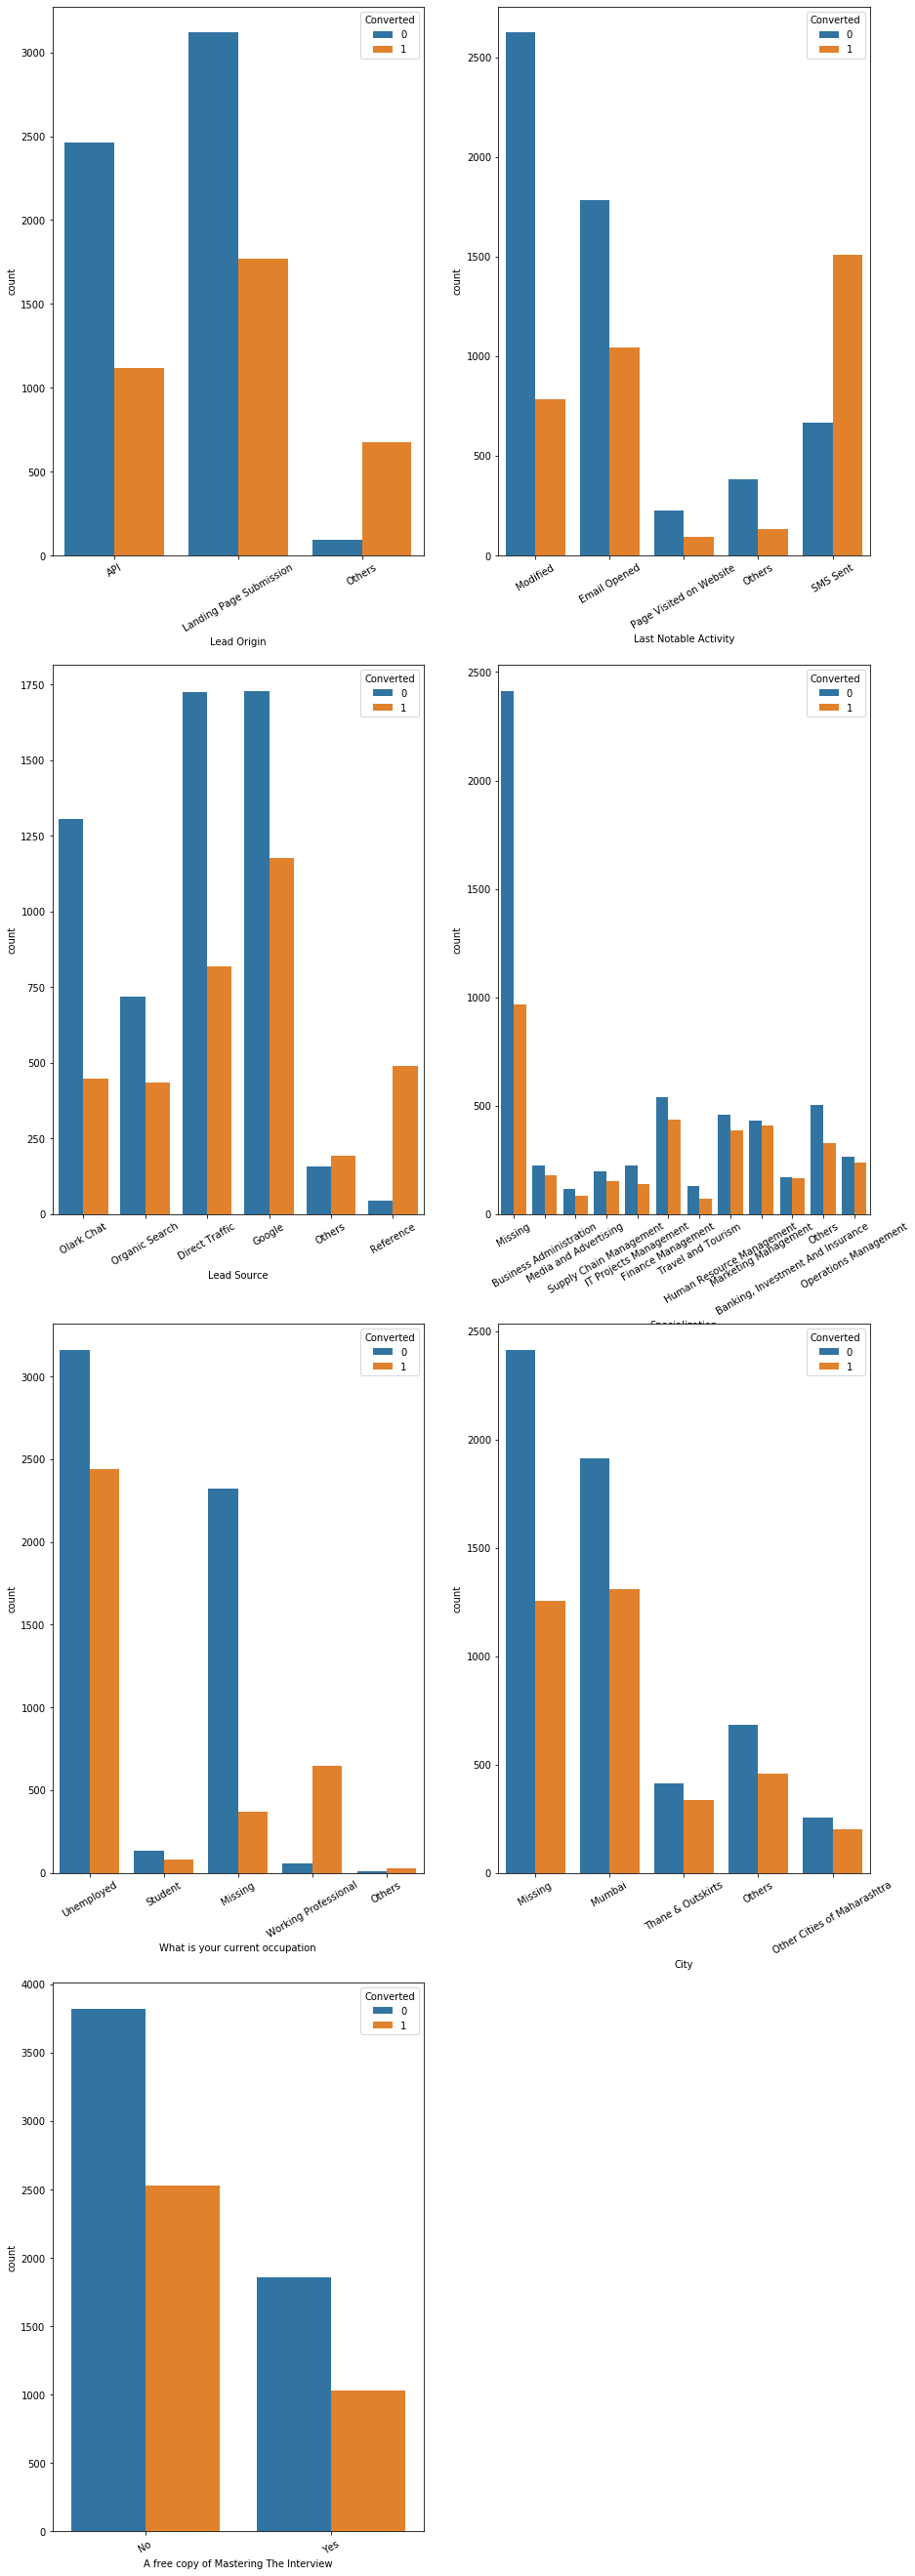

In [2192]:
# We can plot mutiple categorical columns with respect to Converted columns: Subplot

leads_data.columns 

columns = ['Lead Origin','Last Notable Activity','Lead Source','Specialization','What is your current occupation','City','A free copy of Mastering The Interview']


plt.figure(figsize = (15, 60))
for i in enumerate(columns):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'Converted', data = leads_data)
    plt.xticks(rotation = 30)

From the above charts we can see that:

- <b>Lead Origin</b> : The leads with Origin other than API and Landing Page Submission has highest conversion rate even though total number is less.
- <b>Last Notable Activity</b> : If last notable activity is 'SMS sent' then the chances of getting converted is higher and 'Page Visited on Website' is lower
- <b>Lead Source</b> : If the leads have come through reference, they have highest conversion rate.
- <b>Specialization</b> : If the specialization is not provided, then the chances of converting is high. 'Media and Advertising' and 'Travel and tourism' have least conversion rate.
- <b>Current Occupation</b> : No. of working professionals converting are way much higher than the those who are not converting. While 'Others' show very less conversion rate.
- <b>City</b> : People from Mumabi are likely to be get converted. People who have not provided the city stands next. And people from 'Other cities of Maharashtra' are very less convertible.
- <b>A free copy of Mastering The Interview</b> : The leads who have not opted for free copy have more conversion rate.


##### Outlier Analysis and Treatment

We will analyse the outliers present in the numeric variables.

In [2193]:
# Checking for outliers in the continuous variables
num_features = leads_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [2194]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_features.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


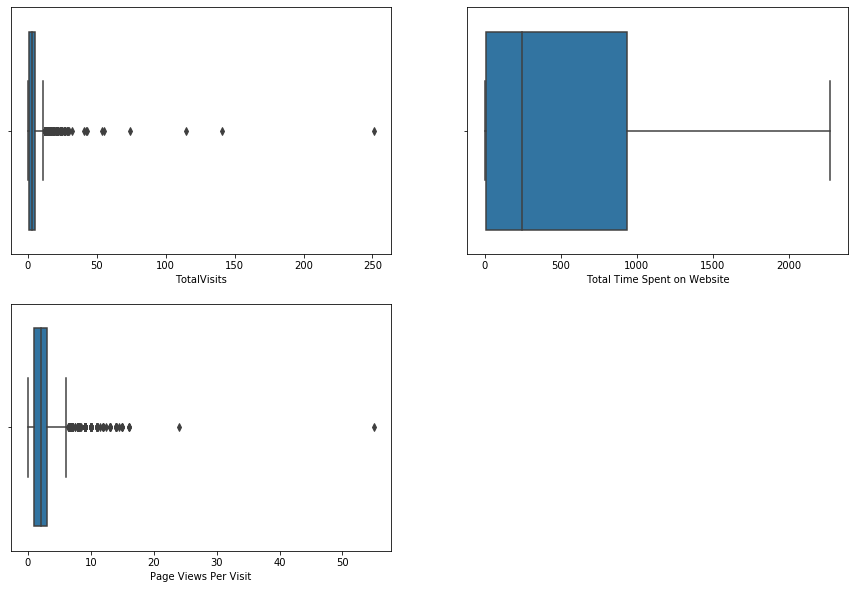

In [2195]:
# Plotting box plots of the TotalVisits, Total Time Spent on Website and Page Views Per Visit to see if there are any outliers

plt.figure(figsize = (15,10))
features = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i in enumerate(features):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(leads_data[i[1]])

As we can see from box plot and percentile distribution, the columns <b>TotalVisits</b> and <b>Page Views Per Visit</b> have extreme outliers on the upper range. We need to treat these outliers because if it remains untreated, it can alter the result.

We can impute the outliers to median which can reduce the effect of it.

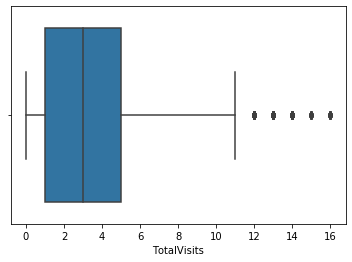

In [2196]:
# Imputing the TotalVisits on upper range.

# We are imputting the values who are above 99th percentile with median
q4 = leads_data['TotalVisits'].quantile(0.99) 

leads_data['TotalVisits'][leads_data['TotalVisits']>=q4] = leads_data['TotalVisits'].median()

sns.boxplot(leads_data['TotalVisits'])

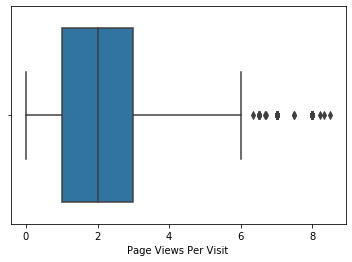

In [2197]:
# Imputing the TotalVisits on upper range.

# We are imputting the values who are above 99th percentile with median
q4 = leads_data['Page Views Per Visit'].quantile(0.99) 

leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit']>=q4] = leads_data['Page Views Per Visit'].median()

sns.boxplot(leads_data['Page Views Per Visit'])

As we can see, the imputting the outliers who are above 99% with the median has reduced the their effect in a very great extent.

### Data Preparation

###### Converting the binary variables (Yes/No) to 0/1

In [2198]:
# Applying the function to the A free copy of Mastering The Interview
leads_data['A free copy of Mastering The Interview'] = leads_data['A free copy of Mastering The Interview'].apply(lambda x : 1 if x=='Yes' else 0)

In [2199]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Missing,Unemployed,Missing,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Missing,Unemployed,Missing,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Missing,Unemployed,Mumbai,0,Modified


##### For categorical variables with multiple levels, create dummy features (one-hot encoded)

Creating dummy variables for the below categorical variables:
    
- 'Lead Origin'
- 'Lead Source'
- 'Specialization'
- 'What is your current occupation'
- 'City'
- 'Last Notable Activity'

In [2200]:
# Creating a dummy variable for some of the categorical variables and dropping the first one. Since there are many levels with big names, not dropping one by one.
dummy1 = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation', 'City','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads_data = pd.concat([leads_data, dummy1], axis=1)

In [2201]:
# A look at the data frame after creating dummy variables.
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities of Maharashtra,City_Others,City_Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Missing,Unemployed,...,1,0,0,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Missing,Unemployed,...,1,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,...,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,...,1,0,1,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Missing,Unemployed,...,1,0,1,0,0,0,1,0,0,0


##### Dropping the repeated variables  

As we have created dummy variables for 'Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation', 'City','Last Notable Activity' columns we can drop these from the dataframe.

In [2202]:
# We have created dummies for the below variables, so we can drop them
leads_data = leads_data.drop(['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation', 'City','Last Notable Activity'],axis=1)

In [2203]:
# Looking at remaining columns after dummyfying the variables and dropping the duplicate ones.
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                             9240 non-null object
Lead Number                                             9240 non-null int64
Converted                                               9240 non-null int64
TotalVisits                                             9240 non-null float64
Total Time Spent on Website                             9240 non-null int64
Page Views Per Visit                                    9240 non-null float64
A free copy of Mastering The Interview                  9240 non-null int64
Lead Origin_Landing Page Submission                     9240 non-null uint8
Lead Origin_Others                                      9240 non-null uint8
Lead Source_Google                                      9240 non-null uint8
Lead Source_Olark Chat                                  9240 non-null uint8
Lead Source_Organic Search                          

Now we can see that you have all variables as numeric.

###### We will rename the columns which are having occupation details to meaning full name

In [2204]:
# Renaming the current occupation columns 

leads_data= leads_data.rename(columns={ 'What is your current occupation_Others' : 'occupation_Others','What is your current occupation_Student':'occupation_Student','What is your current occupation_Unemployed':'occupation_Unemployed','What is your current occupation_Working Professional':'occupation_Working Professional'})

leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Converted                                        9240 non-null int64
TotalVisits                                      9240 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9240 non-null float64
A free copy of Mastering The Interview           9240 non-null int64
Lead Origin_Landing Page Submission              9240 non-null uint8
Lead Origin_Others                               9240 non-null uint8
Lead Source_Google                               9240 non-null uint8
Lead Source_Olark Chat                           9240 non-null uint8
Lead Source_Organic Search                       9240 non-null uint8
Lead Source_Others                               9240 non-nu

### Test-Train Split

We will be starting with Modeling soon. Before that, we need to split our dataset into train and test.

In [2386]:
# Importing the required libraries
from sklearn.model_selection import train_test_split

Creating X dataframe with all the independant variables.

In [2387]:
# Putting feature variable to X
X = leads_data.drop(['Converted','Prospect ID','Lead Number'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,occupation_Unemployed,occupation_Working Professional,City_Mumbai,City_Other Cities of Maharashtra,City_Others,City_Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
4,2.0,1428,1.0,0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0


In [2388]:
# Putting target variable to y
y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [2389]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

We need to scale our numeric features to bring them in same range.

In [2390]:
# Importing the required libraries
from sklearn.preprocessing import StandardScaler

In [2391]:
# Scaling the numerical features.
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,occupation_Unemployed,occupation_Working Professional,City_Mumbai,City_Other Cities of Maharashtra,City_Others,City_Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1871,-1.095607,-0.885371,-1.233168,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6795,0.290280,0.005716,-0.496271,1,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3516,0.636751,-0.691418,0.151977,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
8105,0.636751,1.365219,1.537122,0,1,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3934,-1.095607,-0.885371,-1.233168,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [2392]:
# Checking the Conversion  Rate
conversion = round((sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100,2)
conversion

38.54

We have almost 39% conversion rate

### Feature Selection Using RFE

We will sleect most inferencial columns using RFE on high level

In [2393]:
# Importing the libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [2394]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

In [2395]:
#  Checking the rfe support and ranking for each column
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Others', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 11),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Specialization_Business Administration', False, 2),
 ('Specialization_Finance Management', False, 13),
 ('Specialization_Human Resource Management', False, 6),
 ('Specialization_IT Projects Management', False, 15),
 ('Specialization_Marketing Management', False, 3),
 ('Specialization_Media and Advertising', False, 12),
 ('Specialization_Missing', True, 1),
 ('Specialization_Operations Management', False, 4),
 ('Specialization_Others', True, 1),
 ('Specialization_Supply Chain Management', False, 5),
 ('Specialization_Travel and Tourism', False, 10),
 ('occupat

In [2396]:
# Storing the columns which are supported by RFE in col
col = X_train.columns[rfe.support_]

In [2397]:
# Viewing the columns not supported by RFE
X_train.columns[~rfe.support_]

Index(['Lead Source_Organic Search', 'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'City_Mumbai',
       'City_Other Cities of Maharashtra', 'City_Others',
       'City_Thane & Outskirts'],
      dtype='object')

### Model Building

##### Model 1

In [2398]:
# Libraries for statsmodel
import statsmodels.api as sm
# library for metrics calculation
from sklearn import metrics

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1 = logm2.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2667.8
Date:                Mon, 07 Sep 2020   Deviance:                       5335.5
Time:                        21:55:04   Pearson chi2:                 6.98e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1967      0.179     -6.693      0.000      -1.547      -0.846
TotalVisits                                       0.2668      0.047      5.670      0.000       0.175       0.359
Total Time Spent on Website                       1.0612      0.040     26.582      0.000       0.983       1.139
Page Views Per Visit                             -0.2108      0.053     -3.944      0.000      -0.315      -0.106
A free copy of Mastering The Interview           -0.2007      0.106     -1.900      0.057      -0.408       0.006
Lead Origin_Landing Page Submission              -0.8352      0.133     -6.285      0.000      -1.096      -0.575
Lead Origin_Others                                2.7216      0.304      8.945      0.000       2.125       3.318
Lead Source_Google                                0.2442      0.099      2.465      0.014       0.050       0.438
Lead Source_Olark Chat                            1.1383      0.154      7.391      0.000       0.836       1.440
Lead Source_Others                                0.2132      0.255      0.835      0.404      -0.287       0.714
Lead Source_Reference                             0.5334      0.363      1.468      0.142      -0.179       1.246
Specialization_Missing                           -0.9806      0.127     -7.717      0.000      -1.230      -0.732
Specialization_Others                            -0.1967      0.126     -1.564      0.118      -0.443       0.050
occupation_Others                                 1.8017      0.527      3.417      0.001       0.768       2.835
occupation_Student                                1.0410      0.242      4.302      0.000       0.567       1.515
occupation_Unemployed                             0.9994      0.088     11.354      0.000       0.827       1.172
occupation_Working Professional                   3.4239      0.204     16.807      0.000       3.025       3.823
Last Notable Activity_Modified                   -0.7290      0.088     -8.310      0.000      -0.901      -0.557
Last Notable Activity_Others                     -0.3544      0.166     -2.140      0.032      -0.679      -0.030
Last Notable Activity_Page Visited on Website    -0.5060      0.196     -2.585      0.010      -0.890      -0.122
Last Notable Activity_SMS Sent                    1.2823      0.089     14.436      0.000       1.108       1.456
=================================================================================================================
"""

In [2399]:
# Getting the predicted values on the train set and assigning it as an array by reshaping it
y_train_pred = res1.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.49226247, 0.11652088, 0.34624896, 0.8309054 , 0.14924211,
       0.99146484, 0.11935725, 0.98887205, 0.10843363, 0.92510209])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [2400]:
# Assigning the predicted Converted probability to Converted_Prob in dataset

y_train_pred_final_m1 = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final_m1['Lead Number'] = leads_data['Lead Number'] #Assigning Lead Number to identify the leads
y_train_pred_final_m1.head()

,Converted,Converted_Prob,Lead Number
0,0,0.492262,660737
1,0,0.116521,660728
2,0,0.346249,660727
3,0,0.830905,660719
4,0,0.149242,660681


##### Creating new column 'predicted' with 1 if Converted > 0.5 else 0

In [2401]:
y_train_pred_final_m1['Predicted'] = y_train_pred_final_m1.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Rearranging the columns
y_train_pred_final_m1 = y_train_pred_final_m1.reindex(['Lead Number','Converted','Converted_Prob','Predicted'], axis=1)

# Let's see the head
y_train_pred_final_m1.head()

,Lead Number,Converted,Converted_Prob,Predicted
0,660737,0,0.492262,0
1,660728,0,0.116521,0
2,660727,0,0.346249,0
3,660719,0,0.830905,1
4,660681,0,0.149242,0


<b>`Lead Score`</b>

In [2402]:
# Calculating the lead score for the model

y_train_pred_final_m1['Lead Score'] = y_train_pred_final_m1.Converted_Prob.map(lambda x: round(x*100))

y_train_pred_final_m1.head()

,Lead Number,Converted,Converted_Prob,Predicted,Lead Score
0,660737,0,0.492262,0,49
1,660728,0,0.116521,0,12
2,660727,0,0.346249,0,35
3,660719,0,0.830905,1,83
4,660681,0,0.149242,0,15


In [2403]:
# Confusion matrix 

confusion1 = metrics.confusion_matrix(y_train_pred_final_m1.Converted, y_train_pred_final_m1.Predicted )
print(confusion1)

[[3546  456]
 [ 735 1731]]


In [2404]:
# To find the sensitivity

TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

# Let's check the overall sensitivity.
round((TP / float(TP+FN)),3)

0.702

From the above sensitivity calculation, we see that it is 0.702 which is way less than the expected conversion rate expected by the X Education Company.So, we need to increase true positives and decrease false Negatives to get a good sensitivity and conversion rate at around 80 %.

So, we will reduce the cut off to 0.4 from 0.5 and check if we are meeting the conversion rate.

###### Making the cut off as 0.4 to increase the TP and decrease FN. Making Predicted as 1 if Converted>0.4 else 0

In [2405]:
y_train_pred_final_m1['Predicted'] = y_train_pred_final_m1.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

# Rearranging the columns
y_train_pred_final_m1 = y_train_pred_final_m1.reindex(['Lead Number','Converted','Converted_Prob','Predicted'], axis=1)

# Let's see the head
y_train_pred_final_m1.head()

,Lead Number,Converted,Converted_Prob,Predicted
0,660737,0,0.492262,1
1,660728,0,0.116521,0
2,660727,0,0.346249,0
3,660719,0,0.830905,1
4,660681,0,0.149242,0


<b>`Lead Score`</b>

In [2406]:
# Calculating the lead score for the model

y_train_pred_final_m1['Lead Score'] = y_train_pred_final_m1.Converted_Prob.map(lambda x: round(x*100))

y_train_pred_final_m1.head()

,Lead Number,Converted,Converted_Prob,Predicted,Lead Score
0,660737,0,0.492262,1,49
1,660728,0,0.116521,0,12
2,660727,0,0.346249,0,35
3,660719,0,0.830905,1,83
4,660681,0,0.149242,0,15


In [2407]:
# Confusion matrix 

confusion1 = metrics.confusion_matrix(y_train_pred_final_m1.Converted, y_train_pred_final_m1.Predicted )
print(confusion1)

[[3336  666]
 [ 565 1901]]


In [2408]:
# To find the sensitivity

TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

# Let's check the overall sensitivity.
round((TP / float(TP+FN)),3)

0.771

So, from above calculation, we are still getting the sensitivity as 0.77 which is little less than the expected Conversion rate. So, we will further reduce the cut off to 0.3 and see if we are able to get conversion rate at around 80%

###### Making the cut off as 0.3 to increase the TP and decrease FN. Making Predicted as 1 if Converted>0.3 else 0

In [2409]:
y_train_pred_final_m1['Predicted'] = y_train_pred_final_m1.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Rearranging the columns
y_train_pred_final_m1 = y_train_pred_final_m1.reindex(['Lead Number','Converted','Converted_Prob','Predicted'], axis=1)

# Let's see the head
y_train_pred_final_m1.head()

,Lead Number,Converted,Converted_Prob,Predicted
0,660737,0,0.492262,1
1,660728,0,0.116521,0
2,660727,0,0.346249,1
3,660719,0,0.830905,1
4,660681,0,0.149242,0


<b>`Lead Score`</b>

In [2410]:
# Calculating the lead score for the model

y_train_pred_final_m1['Lead Score'] = y_train_pred_final_m1.Converted_Prob.map(lambda x: round(x*100))

y_train_pred_final_m1.head()

,Lead Number,Converted,Converted_Prob,Predicted,Lead Score
0,660737,0,0.492262,1,49
1,660728,0,0.116521,0,12
2,660727,0,0.346249,1,35
3,660719,0,0.830905,1,83
4,660681,0,0.149242,0,15


In [2411]:
# Confusion matrix 

confusion1 = metrics.confusion_matrix(y_train_pred_final_m1.Converted, y_train_pred_final_m1.Predicted )
print(confusion1)

[[3091  911]
 [ 379 2087]]


In [2412]:
# To find the sensitivity

TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

# Let's check the overall sensitivity.
round((TP / float(TP+FN)),3)

0.846

As we can see from the above calculation, we have got a pretty good sensitivity and Conversion rate i.e. 84.6% which meets the Company's expectation. Now, we can proceed to build further models by removing the features and maintaining the sensitivity above or around 80%.

###### `VIF for Model 1`

In [2413]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Others,6.70
9,Lead Source_Reference,5.62
4,Lead Origin_Landing Page Submission,4.46
14,occupation_Unemployed,2.94
10,Specialization_Missing,2.90
3,A free copy of Mastering The Interview,2.67
7,Lead Source_Olark Chat,2.64
2,Page Views Per Visit,2.45
16,Last Notable Activity_Modified,2.11
6,Lead Source_Google,2.09


From the Model 1, we saw that the sensitivity is coming as 84.6% which is indicates a good model. Further we also saw that:
- <b>Lead Source_Others has highest p-Value i.e. 0.404 which is very high</b> and ,
- <b>VIF for Lead Origin_Others is highest i.e. 6.70 which can be inspected if all other variables have ideal p-value</b>. 

So, we will make another model by <b>removing Lead Source_Others</b> as it has high p-value

###### Model 2

In [2414]:
# Removing Lead Source_Others

col_2 = col.drop('Lead Source_Others')

In [2415]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col_2])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm3.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2668.1
Date:                Mon, 07 Sep 2020   Deviance:                       5336.2
Time:                        21:55:28   Pearson chi2:                 6.97e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1689      0.176     -6.655      0.000      -1.513      -0.825
TotalVisits                                       0.2687      0.047      5.713      0.000       0.177       0.361
Total Time Spent on Website                       1.0609      0.040     26.579      0.000       0.983       1.139
Page Views Per Visit                             -0.2107      0.053     -3.941      0.000      -0.315      -0.106
A free copy of Mastering The Interview           -0.2126      0.105     -2.031      0.042      -0.418      -0.007
Lead Origin_Landing Page Submission              -0.8451      0.132     -6.381      0.000      -1.105      -0.585
Lead Origin_Others                                2.8831      0.237     12.150      0.000       2.418       3.348
Lead Source_Google                                0.2234      0.096      2.331      0.020       0.036       0.411
Lead Source_Olark Chat                            1.1148      0.151      7.368      0.000       0.818       1.411
Lead Source_Reference                             0.3484      0.289      1.204      0.228      -0.219       0.915
Specialization_Missing                           -0.9817      0.127     -7.722      0.000      -1.231      -0.733
Specialization_Others                            -0.1997      0.126     -1.589      0.112      -0.446       0.047
occupation_Others                                 1.7923      0.527      3.400      0.001       0.759       2.825
occupation_Student                                1.0380      0.242      4.288      0.000       0.564       1.512
occupation_Unemployed                             0.9976      0.088     11.336      0.000       0.825       1.170
occupation_Working Professional                   3.4224      0.204     16.807      0.000       3.023       3.821
Last Notable Activity_Modified                   -0.7273      0.088     -8.295      0.000      -0.899      -0.555
Last Notable Activity_Others                     -0.3532      0.166     -2.132      0.033      -0.678      -0.028
Last Notable Activity_Page Visited on Website    -0.5068      0.196     -2.589      0.010      -0.890      -0.123
Last Notable Activity_SMS Sent                    1.2795      0.089     14.417      0.000       1.106       1.453
=================================================================================================================
"""

In [2416]:
# Getting the predicted values on the train set and assigning it as an array by reshaping it

y_train_pred = res2.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.49239601, 0.11690564, 0.34690469, 0.82955144, 0.1493839 ,
       0.99157913, 0.11979064, 0.98892048, 0.09167511, 0.92513371])

In [2417]:
# Assigning the predicted Converted probability to Converted_Prob in dataset

y_train_pred_final_m2 = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final_m2['Lead Number'] = leads_data['Lead Number'] #Assigning Lead Number to identify the leads
y_train_pred_final_m2.head()

,Converted,Converted_Prob,Lead Number
0,0,0.492396,660737
1,0,0.116906,660728
2,0,0.346905,660727
3,0,0.829551,660719
4,0,0.149384,660681


In [2418]:
# Assigning 1 to Predicted if Converted is >0.3 else 0

y_train_pred_final_m2['Predicted'] = y_train_pred_final_m2.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Rearranging the columns
y_train_pred_final_m2 = y_train_pred_final_m2.reindex(['Lead Number','Converted','Converted_Prob','Predicted'], axis=1)

y_train_pred_final_m2.head()

,Lead Number,Converted,Converted_Prob,Predicted
0,660737,0,0.492396,1
1,660728,0,0.116906,0
2,660727,0,0.346905,1
3,660719,0,0.829551,1
4,660681,0,0.149384,0


<b>`Lead Score`</b>

In [2419]:
# Calculating the lead score for the model

y_train_pred_final_m2['Lead Score'] = y_train_pred_final_m2.Converted_Prob.map(lambda x: round(x*100))

y_train_pred_final_m2.head()

,Lead Number,Converted,Converted_Prob,Predicted,Lead Score
0,660737,0,0.492396,1,49
1,660728,0,0.116906,0,12
2,660727,0,0.346905,1,35
3,660719,0,0.829551,1,83
4,660681,0,0.149384,0,15


In [2420]:
# Confusion matrix 

confusion2 = metrics.confusion_matrix(y_train_pred_final_m2.Converted, y_train_pred_final_m2.Predicted )
print(confusion2)

[[3088  914]
 [ 378 2088]]


In [2421]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's check the overall sensitivity.
round(TP / float(TP+FN),3)

0.847

The sensitivity has not dropped.

###### `VIF for Model 2`

In [2422]:
vif = pd.DataFrame()
vif['Features'] = X_train[col_2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_2].values, i) for i in range(X_train[col_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,4.44
5,Lead Origin_Others,4.17
8,Lead Source_Reference,3.67
13,occupation_Unemployed,2.93
9,Specialization_Missing,2.79
3,A free copy of Mastering The Interview,2.65
7,Lead Source_Olark Chat,2.60
2,Page Views Per Visit,2.45
15,Last Notable Activity_Modified,2.11
0,TotalVisits,2.03


From the Model 2, we saw that the sensitivity is coming as 84.7% which shows that it has not dropped from previous model. Further we also saw that:
- <b>Lead Source_Reference has highest p-Value i.e. 0.228 which is very high</b> and ,
- <b>VIF for Lead Origin_Landing Page Submission is highest i.e. 4.44 which is in acceptable range</b>. 

So, we will make another model by <b>removing Lead Source_Reference</b> as it has high p-value

###### Model 3

In [2423]:
# Dropping Lead Source_Reference

col_3 = col_2.drop('Lead Source_Reference')

In [2424]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col_3])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2668.8
Date:                Mon, 07 Sep 2020   Deviance:                       5337.7
Time:                        21:55:38   Pearson chi2:                 6.88e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1399      0.174     -6.556      0.000      -1.481      -0.799
TotalVisits                                       0.2677      0.047      5.691      0.000       0.176       0.360
Total Time Spent on Website                       1.0607      0.040     26.577      0.000       0.983       1.139
Page Views Per Visit                             -0.2126      0.053     -3.977      0.000      -0.317      -0.108
A free copy of Mastering The Interview           -0.2200      0.104     -2.105      0.035      -0.425      -0.015
Lead Origin_Landing Page Submission              -0.8654      0.131     -6.589      0.000      -1.123      -0.608
Lead Origin_Others                                3.0623      0.189     16.189      0.000       2.692       3.433
Lead Source_Google                                0.2156      0.096      2.252      0.024       0.028       0.403
Lead Source_Olark Chat                            1.1072      0.151      7.320      0.000       0.811       1.404
Specialization_Missing                           -1.0115      0.125     -8.124      0.000      -1.256      -0.767
Specialization_Others                            -0.1988      0.126     -1.583      0.113      -0.445       0.047
occupation_Others                                 1.8021      0.525      3.431      0.001       0.773       2.831
occupation_Student                                1.0460      0.241      4.332      0.000       0.573       1.519
occupation_Unemployed                             0.9968      0.088     11.324      0.000       0.824       1.169
occupation_Working Professional                   3.4247      0.204     16.822      0.000       3.026       3.824
Last Notable Activity_Modified                   -0.7268      0.088     -8.292      0.000      -0.899      -0.555
Last Notable Activity_Others                     -0.3526      0.166     -2.128      0.033      -0.677      -0.028
Last Notable Activity_Page Visited on Website    -0.5069      0.196     -2.589      0.010      -0.891      -0.123
Last Notable Activity_SMS Sent                    1.2804      0.089     14.424      0.000       1.106       1.454
=================================================================================================================
"""

In [2425]:
# Getting the predicted values on the train set and assigning it as an array by reshaping it

y_train_pred = res3.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.49844616, 0.11398661, 0.3446479 , 0.82928868, 0.14873685,
       0.99167552, 0.11967949, 0.98731396, 0.09181054, 0.92457801])

In [2426]:
# Assigning the predicted Converted probability to Converted_Prob in dataset

y_train_pred_final_m3 = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final_m3['Lead Number'] = leads_data['Lead Number'] #Assigning Lead Number to identify the leads
y_train_pred_final_m3.head()

,Converted,Converted_Prob,Lead Number
0,0,0.498446,660737
1,0,0.113987,660728
2,0,0.344648,660727
3,0,0.829289,660719
4,0,0.148737,660681


In [2427]:
# Assigning 1 to Predicted if Converted is >0.3 else 0

y_train_pred_final_m3['Predicted'] = y_train_pred_final_m3.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Rearranging the columns
y_train_pred_final_m3 = y_train_pred_final_m3.reindex(['Lead Number','Converted','Converted_Prob','Predicted'], axis=1)

y_train_pred_final_m3.head()

,Lead Number,Converted,Converted_Prob,Predicted
0,660737,0,0.498446,1
1,660728,0,0.113987,0
2,660727,0,0.344648,1
3,660719,0,0.829289,1
4,660681,0,0.148737,0


<b>`Lead Score`</b>

In [2428]:
# Calculating the lead score for the model

y_train_pred_final_m3['Lead Score'] = y_train_pred_final_m3.Converted_Prob.map(lambda x: round(x*100))

y_train_pred_final_m3.head()

,Lead Number,Converted,Converted_Prob,Predicted,Lead Score
0,660737,0,0.498446,1,50
1,660728,0,0.113987,0,11
2,660727,0,0.344648,1,34
3,660719,0,0.829289,1,83
4,660681,0,0.148737,0,15


In [2429]:
# Confusion matrix 

confusion3 = metrics.confusion_matrix(y_train_pred_final_m3.Converted, y_train_pred_final_m3.Predicted )
print(confusion3)

[[3088  914]
 [ 377 2089]]


In [2430]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

# Let's check the overall sensitivity.
round(TP / float(TP+FN),3)

0.847

The sensitivity has not dropped and it still is same.

###### `VIF for Model 3`

In [2431]:
vif = pd.DataFrame()
vif['Features'] = X_train[col_3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_3].values, i) for i in range(X_train[col_3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,4.43
12,occupation_Unemployed,2.93
8,Specialization_Missing,2.73
3,A free copy of Mastering The Interview,2.65
7,Lead Source_Olark Chat,2.59
2,Page Views Per Visit,2.45
14,Last Notable Activity_Modified,2.10
0,TotalVisits,2.02
6,Lead Source_Google,2.01
17,Last Notable Activity_SMS Sent,1.81


From the Model 3, we saw that the sensitivity is coming as 84.7% which shows that it has not dropped from previous model. Further we also saw that:
- <b>Specialization_Others has highest p-Value i.e. 0.113 which is very high</b> and ,
- <b>VIF for Lead Origin_Landing Page Submission is highest i.e. 4.43 which is in acceptable range</b>. 

So, we will make another model by <b>removing Specialization_Others</b> as it has high p-value

###### Model 4

In [2432]:
# dropping Specialization_Others from selected columns

col_4 = col_3.drop('Specialization_Others')

In [2433]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col_4])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res4 = logm3.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2670.1
Date:                Mon, 07 Sep 2020   Deviance:                       5340.2
Time:                        21:55:48   Pearson chi2:                 6.87e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1699      0.173     -6.767      0.000      -1.509      -0.831
TotalVisits                                       0.2668      0.047      5.669      0.000       0.175       0.359
Total Time Spent on Website                       1.0608      0.040     26.586      0.000       0.983       1.139
Page Views Per Visit                             -0.2133      0.053     -3.991      0.000      -0.318      -0.109
A free copy of Mastering The Interview           -0.2254      0.104     -2.158      0.031      -0.430      -0.021
Lead Origin_Landing Page Submission              -0.8621      0.131     -6.563      0.000      -1.120      -0.605
Lead Origin_Others                                3.0592      0.189     16.181      0.000       2.689       3.430
Lead Source_Google                                0.2219      0.096      2.320      0.020       0.034       0.409
Lead Source_Olark Chat                            1.1100      0.151      7.341      0.000       0.814       1.406
Specialization_Missing                           -0.9854      0.123     -7.985      0.000      -1.227      -0.744
occupation_Others                                 1.8139      0.525      3.457      0.001       0.786       2.842
occupation_Student                                1.0366      0.242      4.292      0.000       0.563       1.510
occupation_Unemployed                             0.9992      0.088     11.351      0.000       0.827       1.172
occupation_Working Professional                   3.4261      0.204     16.835      0.000       3.027       3.825
Last Notable Activity_Modified                   -0.7277      0.088     -8.304      0.000      -0.900      -0.556
Last Notable Activity_Others                     -0.3562      0.166     -2.148      0.032      -0.681      -0.031
Last Notable Activity_Page Visited on Website    -0.5044      0.196     -2.577      0.010      -0.888      -0.121
Last Notable Activity_SMS Sent                    1.2782      0.089     14.407      0.000       1.104       1.452
=================================================================================================================
"""

In [2434]:
# Getting the predicted values on the train set and assigning it as an array by reshaping it

y_train_pred = res4.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.49270943, 0.11362604, 0.3447657 , 0.85290271, 0.14901915,
       0.99144379, 0.1384533 , 0.98690081, 0.09150722, 0.9247874 ])

In [2435]:
# Assigning the predicted Converted probability to Converted_Prob in dataset

y_train_pred_final_m4 = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final_m4['Lead Number'] = leads_data['Lead Number'] #Assigning Lead Number to identify the leads
y_train_pred_final_m4.head()

,Converted,Converted_Prob,Lead Number
0,0,0.492709,660737
1,0,0.113626,660728
2,0,0.344766,660727
3,0,0.852903,660719
4,0,0.149019,660681


In [2436]:
# 'predicted' as 1 if Converted_Prob > 0.3 else 0

y_train_pred_final_m4['Predicted'] = y_train_pred_final_m4.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Rearranging the columns
y_train_pred_final_m4 = y_train_pred_final_m4.reindex(['Lead Number','Converted','Converted_Prob','Predicted'], axis=1)

y_train_pred_final_m4.head()

,Lead Number,Converted,Converted_Prob,Predicted
0,660737,0,0.492709,1
1,660728,0,0.113626,0
2,660727,0,0.344766,1
3,660719,0,0.852903,1
4,660681,0,0.149019,0


<b>`Lead Score`</b>

In [2437]:
# Calculating the lead score for the model

y_train_pred_final_m4['Lead Score'] = y_train_pred_final_m4.Converted_Prob.map(lambda x: round(x*100))

y_train_pred_final_m4.head()

,Lead Number,Converted,Converted_Prob,Predicted,Lead Score
0,660737,0,0.492709,1,49
1,660728,0,0.113626,0,11
2,660727,0,0.344766,1,34
3,660719,0,0.852903,1,85
4,660681,0,0.149019,0,15


In [2438]:
# Confusion matrix 

confusion4 = metrics.confusion_matrix(y_train_pred_final_m4.Converted, y_train_pred_final_m4.Predicted )
print(confusion4)

[[3089  913]
 [ 381 2085]]


In [2439]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

# Let's check the overall sensitivity.
round(TP / float(TP+FN),3)

0.845

The sensitivity has slightly dropped from 0.847 to 0.845.

###### `VIF for Model 4`

In [2440]:
vif = pd.DataFrame()
vif['Features'] = X_train[col_4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_4].values, i) for i in range(X_train[col_4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,4.40
11,occupation_Unemployed,2.93
8,Specialization_Missing,2.71
3,A free copy of Mastering The Interview,2.63
7,Lead Source_Olark Chat,2.59
2,Page Views Per Visit,2.45
13,Last Notable Activity_Modified,2.09
0,TotalVisits,2.02
6,Lead Source_Google,2.01
16,Last Notable Activity_SMS Sent,1.80


From the Model 4, we saw that the sensitivity is coming as 84.5% which shows that it has not dropped from previous model. Further we also saw that:
- all variables are having p-value<0.05 and show that they are relevant to the prediction of converted variable
- <b>VIF for Lead Origin_Landing Page Submission is highest i.e. 4.40 which is in acceptable range</b>. 

Even though we have got a good model with good sensitivity, we still have lot of variables. We can try and remove few more variables so that our model doesn't get complex because of presence of lot of features.

Here, we saw that already every feature has p-value and VIF in the acceptable range. However, to reduce the numbers we can remove the features whose p- value is higher among them.

So, we will make another model by <b>removing Last Notable Activity_Others</b> as it has high p-value among all others.

###### Model 5

In [2441]:
# dropping Last Notable Activity_Others

col_5 = col_4.drop('Last Notable Activity_Others')

In [2442]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col_5])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res5 = logm3.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2672.5
Date:                Mon, 07 Sep 2020   Deviance:                       5345.0
Time:                        21:55:57   Pearson chi2:                 6.87e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2161      0.172     -7.086      0.000      -1.552      -0.880
TotalVisits                                       0.2657      0.047      5.650      0.000       0.174       0.358
Total Time Spent on Website                       1.0612      0.040     26.601      0.000       0.983       1.139
Page Views Per Visit                             -0.2120      0.053     -3.968      0.000      -0.317      -0.107
A free copy of Mastering The Interview           -0.2276      0.104     -2.181      0.029      -0.432      -0.023
Lead Origin_Landing Page Submission              -0.8613      0.131     -6.561      0.000      -1.119      -0.604
Lead Origin_Others                                3.0596      0.189     16.185      0.000       2.689       3.430
Lead Source_Google                                0.2213      0.096      2.315      0.021       0.034       0.409
Lead Source_Olark Chat                            1.0962      0.151      7.261      0.000       0.800       1.392
Specialization_Missing                           -0.9948      0.123     -8.071      0.000      -1.236      -0.753
occupation_Others                                 1.8143      0.527      3.440      0.001       0.780       2.848
occupation_Student                                1.0596      0.241      4.393      0.000       0.587       1.532
occupation_Unemployed                             1.0051      0.088     11.426      0.000       0.833       1.178
occupation_Working Professional                   3.4293      0.204     16.843      0.000       3.030       3.828
Last Notable Activity_Modified                   -0.6791      0.085     -8.001      0.000      -0.845      -0.513
Last Notable Activity_Page Visited on Website    -0.4579      0.195     -2.352      0.019      -0.839      -0.076
Last Notable Activity_SMS Sent                    1.3248      0.086     15.355      0.000       1.156       1.494
=================================================================================================================
"""

In [2443]:
# Getting the predicted values on the train set and assigning it as an array by reshaping it

y_train_pred = res5.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.47900764, 0.10847702, 0.33039591, 0.85396171, 0.14704434,
       0.99148406, 0.13343968, 0.98697477, 0.09094375, 0.92456916])

In [2444]:
# Assigning the predicted Converted probability to Converted_Prob in dataset

y_train_pred_final_m5 = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final_m5['Lead Number'] = leads_data['Lead Number'] #Assigning Lead Number to identify the leads
y_train_pred_final_m5.head()

,Converted,Converted_Prob,Lead Number
0,0,0.479008,660737
1,0,0.108477,660728
2,0,0.330396,660727
3,0,0.853962,660719
4,0,0.147044,660681


In [2445]:
# 'predicted' as 1 if Converted_Prob > 0.3 else 0

y_train_pred_final_m5['Predicted'] = y_train_pred_final_m5.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Rearranging the columns
y_train_pred_final_m5 = y_train_pred_final_m5.reindex(['Lead Number','Converted','Converted_Prob','Predicted'], axis=1)

y_train_pred_final_m5.head()

,Lead Number,Converted,Converted_Prob,Predicted
0,660737,0,0.479008,1
1,660728,0,0.108477,0
2,660727,0,0.330396,1
3,660719,0,0.853962,1
4,660681,0,0.147044,0


<b>`Lead Score`</b>

In [2446]:
# Calculating the lead score for the model

y_train_pred_final_m5['Lead Score'] = y_train_pred_final_m5.Converted_Prob.map(lambda x: round(x*100))

y_train_pred_final_m5.head()

,Lead Number,Converted,Converted_Prob,Predicted,Lead Score
0,660737,0,0.479008,1,48
1,660728,0,0.108477,0,11
2,660727,0,0.330396,1,33
3,660719,0,0.853962,1,85
4,660681,0,0.147044,0,15


In [2447]:
# Confusion matrix 

confusion5 = metrics.confusion_matrix(y_train_pred_final_m5.Converted, y_train_pred_final_m5.Predicted )
print(confusion5)

[[3091  911]
 [ 382 2084]]


In [2448]:
TP = confusion5[1,1] # true positive 
TN = confusion5[0,0] # true negatives
FP = confusion5[0,1] # false positives
FN = confusion5[1,0] # false negatives

# Let's check the overall sensitivity.
round(TP / float(TP+FN),3)

0.845

The sensitivity has not dropped and it still is same.

###### `VIF for Model 5`

In [2449]:
vif = pd.DataFrame()
vif['Features'] = X_train[col_5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_5].values, i) for i in range(X_train[col_5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,4.33
11,occupation_Unemployed,2.92
8,Specialization_Missing,2.64
3,A free copy of Mastering The Interview,2.62
7,Lead Source_Olark Chat,2.54
2,Page Views Per Visit,2.45
0,TotalVisits,2.02
6,Lead Source_Google,2.00
13,Last Notable Activity_Modified,1.94
15,Last Notable Activity_SMS Sent,1.71


From the Model 5, we saw that the sensitivity is coming as 84.5% which shows that it has not dropped from previous model. Further we also saw that:
- all variables are having p-value<0.05 and show that they are relevant to the prediction of converted variable
- <b>VIF for Lead Origin_Landing Page Submission is highest i.e. 4.33 which is in acceptable range</b>. 

Even though we have got a good model with good sensitivity, we still have lot of variables. We can try and remove few more variables so that our model doesn't get complex because of presence of lot of features.

Here, we saw that already every feature has p-value and VIF in the acceptable range. However, to reduce the numbers we can remove the features whose p- value is higher among them.

So, we will make another model by <b>removing A free copy of Mastering The Interview</b> as it has high p-value among all others.

###### Model 6

In [2450]:
# Dropping the 
col_6 = col_5.drop('A free copy of Mastering The Interview')

In [2451]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col_6])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res6 = logm3.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2674.8
Date:                Mon, 07 Sep 2020   Deviance:                       5349.7
Time:                        21:56:06   Pearson chi2:                 6.85e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3426      0.162     -8.308      0.000      -1.659      -1.026
TotalVisits                                       0.2611      0.047      5.554      0.000       0.169       0.353
Total Time Spent on Website                       1.0604      0.040     26.597      0.000       0.982       1.139
Page Views Per Visit                             -0.2046      0.053     -3.842      0.000      -0.309      -0.100
Lead Origin_Landing Page Submission              -0.9057      0.130     -6.980      0.000      -1.160      -0.651
Lead Origin_Others                                3.1430      0.185     16.943      0.000       2.779       3.507
Lead Source_Google                                0.3311      0.082      4.059      0.000       0.171       0.491
Lead Source_Olark Chat                            1.1703      0.147      7.936      0.000       0.881       1.459
Specialization_Missing                           -0.9413      0.121     -7.796      0.000      -1.178      -0.705
occupation_Others                                 1.8329      0.527      3.477      0.001       0.800       2.866
occupation_Student                                1.0695      0.240      4.450      0.000       0.598       1.541
occupation_Unemployed                             1.0072      0.088     11.457      0.000       0.835       1.179
occupation_Working Professional                   3.4420      0.204     16.904      0.000       3.043       3.841
Last Notable Activity_Modified                   -0.6764      0.085     -7.973      0.000      -0.843      -0.510
Last Notable Activity_Page Visited on Website    -0.4548      0.194     -2.338      0.019      -0.836      -0.074
Last Notable Activity_SMS Sent                    1.3242      0.086     15.358      0.000       1.155       1.493
=================================================================================================================
"""

In [2452]:
# Getting the predicted values on the train set and assigning it as an array by reshaping it

y_train_pred = res6.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.4656557 , 0.11930288, 0.3308275 , 0.84730992, 0.14737195,
       0.98999725, 0.14034953, 0.98660924, 0.08514198, 0.92690512])

In [2453]:
# Assigning the predicted Converted probability to Converted_Prob in final dataset 

y_train_pred_final_m6 = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final_m6['Lead Number'] = leads_data['Lead Number'] #Assigning Lead Number to identify the leads
y_train_pred_final_m6.head()

,Converted,Converted_Prob,Lead Number
0,0,0.465656,660737
1,0,0.119303,660728
2,0,0.330827,660727
3,0,0.847310,660719
4,0,0.147372,660681


In [2454]:
# 'Predicted' as 1 if Converted_Prob > 0.3 else 0
y_train_pred_final_m6['Predicted'] = y_train_pred_final_m6.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Rearranging the columns
y_train_pred_final_m6 = y_train_pred_final_m6.reindex(['Lead Number','Converted','Converted_Prob','Predicted'], axis=1)

y_train_pred_final_m6.head()

,Lead Number,Converted,Converted_Prob,Predicted
0,660737,0,0.465656,1
1,660728,0,0.119303,0
2,660727,0,0.330827,1
3,660719,0,0.847310,1
4,660681,0,0.147372,0


<b>`Lead Score`</b>

In [2455]:
# Calculating the lead score for the model

y_train_pred_final_m6['Lead Score'] = y_train_pred_final_m6.Converted_Prob.map(lambda x: round(x*100))

y_train_pred_final_m6.head()

,Lead Number,Converted,Converted_Prob,Predicted,Lead Score
0,660737,0,0.465656,1,47
1,660728,0,0.119303,0,12
2,660727,0,0.330827,1,33
3,660719,0,0.847310,1,85
4,660681,0,0.147372,0,15


In [2456]:
# Confusion matrix 
confusion6 = metrics.confusion_matrix(y_train_pred_final_m6.Converted, y_train_pred_final_m6.Predicted )
print(confusion6)

[[3072  930]
 [ 379 2087]]


In [2457]:
TP = confusion6[1,1] # true positive 
TN = confusion6[0,0] # true negatives
FP = confusion6[0,1] # false positives
FN = confusion6[1,0] # false negatives

# Let's check the overall sensitivity.
round(TP / float(TP+FN),3)

0.846

The sensitivity has not dropped and has increased from 0.845 to 0.846.

###### `VIF for Model 6`

In [2458]:
vif = pd.DataFrame()
vif['Features'] = X_train[col_6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_6].values, i) for i in range(X_train[col_6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,2.93
10,occupation_Unemployed,2.86
7,Specialization_Missing,2.63
6,Lead Source_Olark Chat,2.53
2,Page Views Per Visit,2.45
0,TotalVisits,2.01
12,Last Notable Activity_Modified,1.93
14,Last Notable Activity_SMS Sent,1.71
4,Lead Origin_Others,1.67
5,Lead Source_Google,1.65


From the Model 6, we saw that the sensitivity is coming as 85.6% which shows that it has not dropped from previous model. Further we also saw that:
- all variables are having p-value<0.05 and show that they are relevant to the prediction of converted variable
- <b>VIF for Lead Origin_Landing Page Submission has dropped to 2.93 which is in acceptable range</b>. 

But in the search of good model, we will further delete features until we have a good model. Right now, we dont have any feature whose p-value and VIF are high. So, we will reduce the highest p-value holder next i.e. we will <b>drop Last Notable Activity_Page Visited on Website</b> and build Model 7

###### Model 7

In [2459]:
# Dropping the Last Notable Activity_Page Visited on Website
col_7 = col_6.drop('Last Notable Activity_Page Visited on Website')

In [2460]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col_7])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res7 = logm3.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2677.7
Date:                Mon, 07 Sep 2020   Deviance:                       5355.4
Time:                        21:56:20   Pearson chi2:                 6.84e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.3802      0.161     -8.584      0.000      -1.695      -1.065
TotalVisits                             0.2409      0.046      5.226      0.000       0.151       0.331
Total Time Spent on Website             1.0588      0.040     26.601      0.000       0.981       1.137
Page Views Per Visit                   -0.1915      0.053     -3.625      0.000      -0.295      -0.088
Lead Origin_Landing Page Submission    -0.9094      0.130     -7.012      0.000      -1.164      -0.655
Lead Origin_Others                      3.1454      0.185     16.962      0.000       2.782       3.509
Lead Source_Google                      0.3352      0.082      4.112      0.000       0.175       0.495
Lead Source_Olark Chat                  1.1726      0.147      7.960      0.000       0.884       1.461
Specialization_Missing                 -0.9440      0.121     -7.820      0.000      -1.181      -0.707
occupation_Others                       1.8297      0.528      3.467      0.001       0.795       2.864
occupation_Student                      1.0709      0.241      4.444      0.000       0.599       1.543
occupation_Unemployed                   1.0108      0.088     11.505      0.000       0.839       1.183
occupation_Working Professional         3.4422      0.203     16.926      0.000       3.044       3.841
Last Notable Activity_Modified         -0.6409      0.084     -7.668      0.000      -0.805      -0.477
Last Notable Activity_SMS Sent          1.3589      0.085     15.975      0.000       1.192       1.526
=======================================================================================================
"""

In [2461]:
# Getting the predicted values on the train set and assigning it as an array by reshaping it

y_train_pred = res7.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.45959236, 0.11387126, 0.32112352, 0.848096  , 0.14843803,
       0.98982753, 0.13394887, 0.98661398, 0.08517984, 0.92654381])

In [2462]:
# Assigning the predicted Converted probability to Converted_Prob in final dataset 

y_train_pred_final_m7 = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final_m7['Lead Number'] = leads_data['Lead Number'] #Assigning Lead Number to identify the leads
y_train_pred_final_m7.head()

,Converted,Converted_Prob,Lead Number
0,0,0.459592,660737
1,0,0.113871,660728
2,0,0.321124,660727
3,0,0.848096,660719
4,0,0.148438,660681


In [2463]:
# 'Predicted' as 1 if Converted_Prob > 0.3 else 0
y_train_pred_final_m7['Predicted'] = y_train_pred_final_m7.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Rearranging the columns
y_train_pred_final_m7 = y_train_pred_final_m7.reindex(['Lead Number','Converted','Converted_Prob','Predicted'], axis=1)

y_train_pred_final_m7.head()

,Lead Number,Converted,Converted_Prob,Predicted
0,660737,0,0.459592,1
1,660728,0,0.113871,0
2,660727,0,0.321124,1
3,660719,0,0.848096,1
4,660681,0,0.148438,0


<b>`Lead Score`</b>

In [2464]:
# Calculating the lead score for the model

y_train_pred_final_m7['Lead Score'] = y_train_pred_final_m7.Converted_Prob.map(lambda x: round(x*100))

y_train_pred_final_m7.head()

,Lead Number,Converted,Converted_Prob,Predicted,Lead Score
0,660737,0,0.459592,1,46
1,660728,0,0.113871,0,11
2,660727,0,0.321124,1,32
3,660719,0,0.848096,1,85
4,660681,0,0.148438,0,15


In [2465]:
# Confusion matrix 
confusion7 = metrics.confusion_matrix(y_train_pred_final_m7.Converted, y_train_pred_final_m7.Predicted )
print(confusion7)

[[3075  927]
 [ 376 2090]]


In [2466]:
TP = confusion7[1,1] # true positive 
TN = confusion7[0,0] # true negatives
FP = confusion7[0,1] # false positives
FN = confusion7[1,0] # false negatives

# Let's check the overall sensitivity.
round(TP / float(TP+FN),3)

0.848

The sensitivity has not dropped and has increased from 0.846 to 0.848.

###### `VIF for Model 7`

In [2467]:
vif = pd.DataFrame()
vif['Features'] = X_train[col_7].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_7].values, i) for i in range(X_train[col_7].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,occupation_Unemployed,2.86
3,Lead Origin_Landing Page Submission,2.85
7,Specialization_Missing,2.60
6,Lead Source_Olark Chat,2.53
2,Page Views Per Visit,2.43
0,TotalVisits,1.95
12,Last Notable Activity_Modified,1.87
4,Lead Origin_Others,1.67
13,Last Notable Activity_SMS Sent,1.67
5,Lead Source_Google,1.65


From the Model 7, we saw that the sensitivity is coming as 84.8% which shows that it has not dropped from previous model. Further we also saw that:
- all variables are having p-value<0.05 and show that they are relevant to the prediction of converted variable
- <b>VIF for Lead Origin_Landing Page Submission has dropped to 2.86 which is in acceptable range</b>. 

In this model also, we dont have any feature whose p-value and VIF are high. So, we will reduce the highest p-value holder next i.e. we will <b>drop occupation_Others</b> and build Model 8

###### Model 8

In [2468]:
# Dropping the occupation_Others
col_8 = col_7.drop('occupation_Others')

In [2469]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col_8])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res8 = logm3.fit()
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2683.9
Date:                Mon, 07 Sep 2020   Deviance:                       5367.8
Time:                        21:56:34   Pearson chi2:                 6.87e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.3092      0.159     -8.240      0.000      -1.621      -0.998
TotalVisits                             0.2415      0.046      5.248      0.000       0.151       0.332
Total Time Spent on Website             1.0605      0.040     26.680      0.000       0.983       1.138
Page Views Per Visit                   -0.1905      0.053     -3.608      0.000      -0.294      -0.087
Lead Origin_Landing Page Submission    -0.9341      0.129     -7.216      0.000      -1.188      -0.680
Lead Origin_Others                      3.1636      0.185     17.074      0.000       2.800       3.527
Lead Source_Google                      0.3279      0.081      4.030      0.000       0.168       0.487
Lead Source_Olark Chat                  1.1621      0.147      7.901      0.000       0.874       1.450
Specialization_Missing                 -0.9749      0.121     -8.090      0.000      -1.211      -0.739
occupation_Student                      1.0295      0.241      4.272      0.000       0.557       1.502
occupation_Unemployed                   0.9679      0.086     11.202      0.000       0.799       1.137
occupation_Working Professional         3.3952      0.203     16.743      0.000       2.998       3.793
Last Notable Activity_Modified         -0.6395      0.083     -7.665      0.000      -0.803      -0.476
Last Notable Activity_SMS Sent          1.3527      0.085     15.913      0.000       1.186       1.519
=======================================================================================================
"""

In [2470]:
# Getting the predicted values on the train set and assigning it as an array by reshaping it

y_train_pred = res8.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.46312233, 0.11110068, 0.31810059, 0.84735374, 0.14652138,
       0.98979109, 0.13438508, 0.98717162, 0.0884622 , 0.92563105])

In [2471]:
# Assigning the predicted Converted probability to Converted_Prob in final dataset 

y_train_pred_final_m8 = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final_m8['Lead Number'] = leads_data['Lead Number'] #Assigning Lead Number to identify the leads
y_train_pred_final_m8.head()

,Converted,Converted_Prob,Lead Number
0,0,0.463122,660737
1,0,0.111101,660728
2,0,0.318101,660727
3,0,0.847354,660719
4,0,0.146521,660681


In [2472]:
# 'Predicted' as 1 if Converted_Prob > 0.3 else 0
y_train_pred_final_m8['Predicted'] = y_train_pred_final_m8.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Rearranging the columns
y_train_pred_final_m8 = y_train_pred_final_m8.reindex(['Lead Number','Converted','Converted_Prob','Predicted'], axis=1)

y_train_pred_final_m8.head()

,Lead Number,Converted,Converted_Prob,Predicted
0,660737,0,0.463122,1
1,660728,0,0.111101,0
2,660727,0,0.318101,1
3,660719,0,0.847354,1
4,660681,0,0.146521,0


<b>`Lead Score`</b>

In [2473]:
# Calculating the lead score for the model

y_train_pred_final_m8['Lead Score'] = y_train_pred_final_m8.Converted_Prob.map(lambda x: round(x*100))

y_train_pred_final_m8.head()

,Lead Number,Converted,Converted_Prob,Predicted,Lead Score
0,660737,0,0.463122,1,46
1,660728,0,0.111101,0,11
2,660727,0,0.318101,1,32
3,660719,0,0.847354,1,85
4,660681,0,0.146521,0,15


In [2474]:
# Confusion matrix 
confusion8 = metrics.confusion_matrix(y_train_pred_final_m8.Converted, y_train_pred_final_m8.Predicted )
print(confusion8)

[[3072  930]
 [ 378 2088]]


In [2475]:
TP = confusion8[1,1] # true positive 
TN = confusion8[0,0] # true negatives
FP = confusion8[0,1] # false positives
FN = confusion8[1,0] # false negatives

# Let's check the overall sensitivity.
round(TP / float(TP+FN),3)

0.847

The sensitivity has dropped from 0.848 to 0.847.

###### `VIF for Model 8`

In [2476]:
vif = pd.DataFrame()
vif['Features'] = X_train[col_8].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_8].values, i) for i in range(X_train[col_8].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,2.84
9,occupation_Unemployed,2.84
7,Specialization_Missing,2.60
6,Lead Source_Olark Chat,2.53
2,Page Views Per Visit,2.43
0,TotalVisits,1.95
11,Last Notable Activity_Modified,1.87
12,Last Notable Activity_SMS Sent,1.67
4,Lead Origin_Others,1.66
5,Lead Source_Google,1.65


From the Model 7, we saw that the sensitivity is coming as 84.7% which shows that it has not dropped from previous model. Further we also saw that:
- all variables are having p-value = 0.00 and show that they are relevant to the prediction of converted variable
- <b>VIF for Lead Origin_Landing Page Submission has dropped to 2.84 which is in acceptable range</b>. 

As we can see thatall the features have p-value 0.000 and VIF in acceptable range and also, the no. of features are not that high and doesn't make the Model complex.

From our models, we can consider Model 6, Model 7 and Model 8 for further evaluation and choose best among them.

### Metrics beyond simply accuracy

###### Model 6

In [2477]:
TP = confusion6[1,1] # true positive 
TN = confusion6[0,0] # true negatives
FP = confusion6[0,1] # false positives
FN = confusion6[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model 6
print("\n"+start+"Sensitivity of our logistic regression model 6 : ",end = '')
print(round(TP / float(TP+FN),3))

# Let us calculate specificity
print("\n"+start+"Specificity of our logistic regression model 6 : ",end = '')
print(round(TN / float(TN+FP),3))

# Calculate false postive rate - predicting Converted when customer does not have Converted
print("\n"+start+"False Postive Rate of our logistic regression model 6 : ",end = '')
print(round((FP/ float(TN+FP)),3))

# positive predictive value 
print("\n"+start+"Positive predictive value of our logistic regression model 6 : ",end = '')
print (round(TP / float(TP+FP),3))

# Negative predictive value
print("\n"+start+"Negative predictive value of our logistic regression model 6 : ",end = '')
print (round(TN / float(TN+ FN),3))


Sensitivity of our logistic regression model 6 : 0.846

Specificity of our logistic regression model 6 : 0.768

False Postive Rate of our logistic regression model 6 : 0.232

Positive predictive value of our logistic regression model 6 : 0.692

Negative predictive value of our logistic regression model 6 : 0.89


###### Model 7

In [2478]:
TP = confusion7[1,1] # true positive 
TN = confusion7[0,0] # true negatives
FP = confusion7[0,1] # false positives
FN = confusion7[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model 7
print("\n"+start+"Sensitivity of our logistic regression model 7 : ",end = '')
print(round(TP / float(TP+FN),3))

# Let us calculate specificity
print("\n"+start+"Specificity of our logistic regression model 7 : ",end = '')
print(round(TN / float(TN+FP),3))

# Calculate false postive rate - predicting Converted when customer does not have Converted
print("\n"+start+"False Postive Rate of our logistic regression model 7 : ",end = '')
print(round((FP/ float(TN+FP)),3))

# positive predictive value 
print("\n"+start+"Positive predictive value of our logistic regression model 7 : ",end = '')
print (round(TP / float(TP+FP),3))

# Negative predictive value
print("\n"+start+"Negative predictive value of our logistic regression model 7 : ",end = '')
print (round(TN / float(TN+ FN),3))


Sensitivity of our logistic regression model 7 : 0.848

Specificity of our logistic regression model 7 : 0.768

False Postive Rate of our logistic regression model 7 : 0.232

Positive predictive value of our logistic regression model 7 : 0.693

Negative predictive value of our logistic regression model 7 : 0.891


###### Model 8

In [2479]:
TP = confusion8[1,1] # true positive 
TN = confusion8[0,0] # true negatives
FP = confusion8[0,1] # false positives
FN = confusion8[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model 8
print("\n"+start+"Sensitivity of our logistic regression model 8 : ",end = '')
print(round(TP / float(TP+FN),3))

# Let us calculate specificity
print("\n"+start+"Specificity of our logistic regression model 8 : ",end = '')
print(round(TN / float(TN+FP),3))

# Calculate false postive rate - predicting Converted when customer does not have Converted
print("\n"+start+"False Postive Rate of our logistic regression model 8 : ",end = '')
print(round((FP/ float(TN+FP)),3))

# positive predictive value 
print("\n"+start+"Positive predictive value of our logistic regression model 8 : ",end = '')
print (round(TP / float(TP+FP),3))

# Negative predictive value
print("\n"+start+"Negative predictive value of our logistic regression model 8 : ",end = '')
print (round(TN / float(TN+ FN),3))


Sensitivity of our logistic regression model 8 : 0.847

Specificity of our logistic regression model 8 : 0.768

False Postive Rate of our logistic regression model 8 : 0.232

Positive predictive value of our logistic regression model 8 : 0.692

Negative predictive value of our logistic regression model 8 : 0.89


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [2480]:
# funtion to calculate ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False ) # getting False Positive Rate, True Positive Rate and Threshold
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

###### Model 6

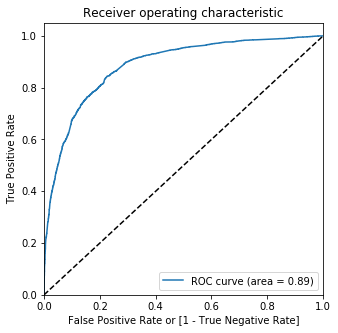

In [2481]:
# Plotting the ROC curve using the function we had written earlier for ROC

draw_roc(y_train_pred_final_m6.Converted, y_train_pred_final_m6.Converted_Prob)

###### Model 7

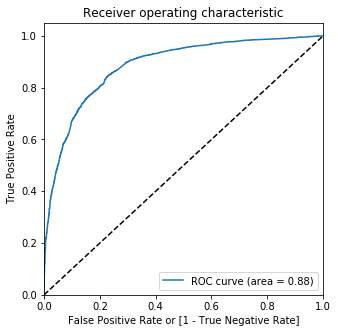

In [2482]:
# Plotting the ROC curve using the function we had written earlier for ROC

draw_roc(y_train_pred_final_m7.Converted, y_train_pred_final_m7.Converted_Prob)

###### Model 8

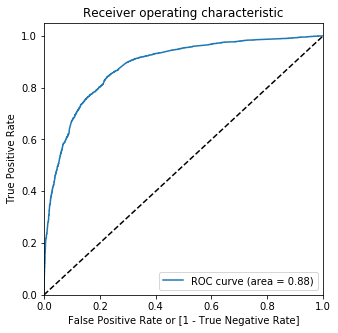

In [2483]:
# Plotting the ROC curve using the function we had written earlier for ROC

draw_roc(y_train_pred_final_m8.Converted, y_train_pred_final_m8.Converted_Prob)

We have received a very ROC curve i.e. it doesn't merge at the 45-degree diagonal and is close to left hand axis and then the top border with 89% area under the curve for Model 6 and 88% area under the curve for Model 7 and Model 8

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

###### Model 6

In [2484]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]  # From 0.0 to 0.9
for i in numbers:
    y_train_pred_final_m6[i]= y_train_pred_final_m6.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_m6.head()

,Lead Number,Converted,Converted_Prob,Predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,660737,0,0.465656,1,47,1,1,1,1,1,0,0,0,0,0
1,660728,0,0.119303,0,12,1,1,0,0,0,0,0,0,0,0
2,660727,0,0.330827,1,33,1,1,1,1,0,0,0,0,0,0
3,660719,0,0.847310,1,85,1,1,1,1,1,1,1,1,1,0
4,660681,0,0.147372,0,15,1,1,0,0,0,0,0,0,0,0


In [2485]:
# calculating accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_m6.Converted, y_train_pred_final_m6[i] )
    
# TP = cm1[1,1] # true positive 
# TN = cm1[0,0] # true negatives
# FP = cm1[0,1] # false positives
# FN = cm1[1,0] # false negatives

    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1 # (TN+TP)/(TP+TN+FP+FN)
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])  # (TN)/(TN+FP)
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1]) # (TP)/(FN+TP)
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.611008  0.970803  0.389305
0.2   0.2  0.761132  0.915247  0.666167
0.3   0.3  0.797619  0.846310  0.767616
0.4   0.4  0.811688  0.773723  0.835082
0.5   0.5  0.814935  0.701946  0.884558
0.6   0.6  0.799474  0.600162  0.922289
0.7   0.7  0.786178  0.529197  0.944528
0.8   0.8  0.757885  0.416869  0.968016
0.9   0.9  0.716914  0.278994  0.986757


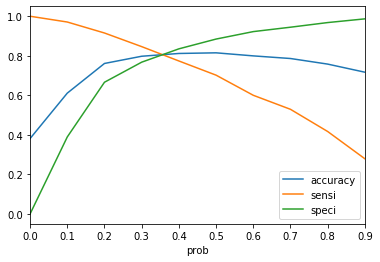

In [2486]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

`From the curve above, 0.35 is the optimum point to take it as a cutoff probability.`

In [2487]:
# Using the optimal cut off received from the above curve

y_train_pred_final_m6['final_predicted'] = y_train_pred_final_m6.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final_m6.head()

,Lead Number,Converted,Converted_Prob,Predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,660737,0,0.465656,1,47,1,1,1,1,1,0,0,0,0,0,1
1,660728,0,0.119303,0,12,1,1,0,0,0,0,0,0,0,0,0
2,660727,0,0.330827,1,33,1,1,1,1,0,0,0,0,0,0,0
3,660719,0,0.847310,1,85,1,1,1,1,1,1,1,1,1,0,1
4,660681,0,0.147372,0,15,1,1,0,0,0,0,0,0,0,0,0


In [2488]:
# confusion matrix
confusion_oc1 = metrics.confusion_matrix(y_train_pred_final_m6.Converted, y_train_pred_final_m6.final_predicted )
confusion_oc1

array([[3222,  780],
       [ 493, 1973]], dtype=int64)

In [2489]:
TP = confusion_oc1[1,1] # true positive 
TN = confusion_oc1[0,0] # true negatives
FP = confusion_oc1[0,1] # false positives
FN = confusion_oc1[1,0] # false negatives

# Let's see the sensitivity of our optimal cut off derived from model 6
print("\n"+start+"Metrics derived based on the cut off of Model 6 : ",end = '')
print("\n"+start+"Sensitivity : ",end = '')
print(round(TP / float(TP+FN),3))

# Let us calculate specificity
print("\n"+start+"Specificity : ",end = '')
print(round(TN / float(TN+FP),3))

# Calculate false postive rate - predicting Converted when customer does not have Converted
print("\n"+start+"False Postive Rate : ",end = '')
print(round((FP/ float(TN+FP)),3))

# positive predictive value 
print("\n"+start+"Positive predictive value : ",end = '')
print (round(TP / float(TP+FP),3))

# Negative predictive value
print("\n"+start+"Negative predictive value : ",end = '')
print (round(TN / float(TN+ FN),3))


Metrics derived based on the cut off of Model 6 : 
Sensitivity : 0.8

Specificity : 0.805

False Postive Rate : 0.195

Positive predictive value : 0.717

Negative predictive value : 0.867


###### Model 7

In [2490]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]  # From 0.0 to 0.9
for i in numbers:
    y_train_pred_final_m7[i]= y_train_pred_final_m7.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_m7.head()

,Lead Number,Converted,Converted_Prob,Predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,660737,0,0.459592,1,46,1,1,1,1,1,0,0,0,0,0
1,660728,0,0.113871,0,11,1,1,0,0,0,0,0,0,0,0
2,660727,0,0.321124,1,32,1,1,1,1,0,0,0,0,0,0
3,660719,0,0.848096,1,85,1,1,1,1,1,1,1,1,1,0
4,660681,0,0.148438,0,15,1,1,0,0,0,0,0,0,0,0


In [2491]:
# calculating accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_m7.Converted, y_train_pred_final_m7[i] )
    
# TP = cm1[1,1] # true positive 
# TN = cm1[0,0] # true negatives
# FP = cm1[0,1] # false positives
# FN = cm1[1,0] # false negatives

    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1 # (TN+TP)/(TP+TN+FP+FN)
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])  # (TN)/(TN+FP)
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1]) # (TP)/(FN+TP)
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.610235  0.970803  0.388056
0.2   0.2  0.761441  0.914031  0.667416
0.3   0.3  0.798547  0.847526  0.768366
0.4   0.4  0.811070  0.773317  0.834333
0.5   0.5  0.814162  0.701946  0.883308
0.6   0.6  0.799165  0.601379  0.921039
0.7   0.7  0.786024  0.529603  0.944028
0.8   0.8  0.758658  0.418086  0.968516
0.9   0.9  0.716450  0.277778  0.986757


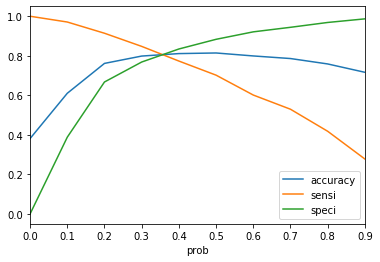

In [2492]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

`From the curve above, 0.35 is the optimum point to take it as a cutoff probability.`

In [2493]:
# Using the optimal cut off received from the above curve

y_train_pred_final_m7['final_predicted'] = y_train_pred_final_m7.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final_m7.head()

,Lead Number,Converted,Converted_Prob,Predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,660737,0,0.459592,1,46,1,1,1,1,1,0,0,0,0,0,1
1,660728,0,0.113871,0,11,1,1,0,0,0,0,0,0,0,0,0
2,660727,0,0.321124,1,32,1,1,1,1,0,0,0,0,0,0,0
3,660719,0,0.848096,1,85,1,1,1,1,1,1,1,1,1,0,1
4,660681,0,0.148438,0,15,1,1,0,0,0,0,0,0,0,0,0


In [2494]:
# confusion matrix
confusion_oc2 = metrics.confusion_matrix(y_train_pred_final_m7.Converted, y_train_pred_final_m7.final_predicted )
confusion_oc2

array([[3222,  780],
       [ 500, 1966]], dtype=int64)

In [2495]:
TP = confusion_oc2[1,1] # true positive 
TN = confusion_oc2[0,0] # true negatives
FP = confusion_oc2[0,1] # false positives
FN = confusion_oc2[1,0] # false negatives

# Let's see the sensitivity of our optimal cut off derived from model 7
print("\n"+start+"Metrics derived based on the cut off of Model 7 : ",end = '')
print("\n"+start+"Sensitivity : ",end = '')
print(round(TP / float(TP+FN),3))

# Let us calculate specificity
print("\n"+start+"Specificity : ",end = '')
print(round(TN / float(TN+FP),3))

# Calculate false postive rate - predicting Converted when customer does not have Converted
print("\n"+start+"False Postive Rate : ",end = '')
print(round((FP/ float(TN+FP)),3))

# positive predictive value 
print("\n"+start+"Positive predictive value : ",end = '')
print (round(TP / float(TP+FP),3))

# Negative predictive value
print("\n"+start+"Negative predictive value : ",end = '')
print (round(TN / float(TN+ FN),3))


Metrics derived based on the cut off of Model 7 : 
Sensitivity : 0.797

Specificity : 0.805

False Postive Rate : 0.195

Positive predictive value : 0.716

Negative predictive value : 0.866


###### Model 8

In [2496]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]  # From 0.0 to 0.9
for i in numbers:
    y_train_pred_final_m8[i]= y_train_pred_final_m8.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_m8.head()

,Lead Number,Converted,Converted_Prob,Predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,660737,0,0.463122,1,46,1,1,1,1,1,0,0,0,0,0
1,660728,0,0.111101,0,11,1,1,0,0,0,0,0,0,0,0
2,660727,0,0.318101,1,32,1,1,1,1,0,0,0,0,0,0
3,660719,0,0.847354,1,85,1,1,1,1,1,1,1,1,1,0
4,660681,0,0.146521,0,15,1,1,0,0,0,0,0,0,0,0


In [2497]:
# calculating accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_m8.Converted, y_train_pred_final_m8[i] )
    
# TP = cm1[1,1] # true positive 
# TN = cm1[0,0] # true negatives
# FP = cm1[0,1] # false positives
# FN = cm1[1,0] # false negatives

    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1 # (TN+TP)/(TP+TN+FP+FN)
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])  # (TN)/(TN+FP)
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1]) # (TP)/(FN+TP)
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.608689  0.970803  0.385557
0.2   0.2  0.760668  0.914031  0.666167
0.3   0.3  0.797774  0.846715  0.767616
0.4   0.4  0.811379  0.772101  0.835582
0.5   0.5  0.814780  0.701541  0.884558
0.6   0.6  0.798701  0.599351  0.921539
0.7   0.7  0.785560  0.528386  0.944028
0.8   0.8  0.757421  0.414436  0.968766
0.9   0.9  0.715523  0.275750  0.986507


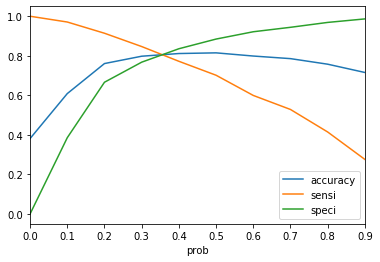

In [2498]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

`From the curve above, 0.35 is the optimum point to take it as a cutoff probability.`

In [2499]:
# Using the optimal cut off received from the above curve

y_train_pred_final_m8['final_predicted'] = y_train_pred_final_m8.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final_m8.head()

,Lead Number,Converted,Converted_Prob,Predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,660737,0,0.463122,1,46,1,1,1,1,1,0,0,0,0,0,1
1,660728,0,0.111101,0,11,1,1,0,0,0,0,0,0,0,0,0
2,660727,0,0.318101,1,32,1,1,1,1,0,0,0,0,0,0,0
3,660719,0,0.847354,1,85,1,1,1,1,1,1,1,1,1,0,1
4,660681,0,0.146521,0,15,1,1,0,0,0,0,0,0,0,0,0


In [2500]:
# confusion matrix
confusion_oc3 = metrics.confusion_matrix(y_train_pred_final_m8.Converted, y_train_pred_final_m8.final_predicted )
confusion_oc3

array([[3227,  775],
       [ 502, 1964]], dtype=int64)

In [2501]:
TP = confusion_oc3[1,1] # true positive 
TN = confusion_oc3[0,0] # true negatives
FP = confusion_oc3[0,1] # false positives
FN = confusion_oc3[1,0] # false negatives

# Let's see the sensitivity of our optimal cut off derived from model 8
print("\n"+start+"Metrics derived based on the cut off of Model 8 : ",end = '')
print("\n"+start+"Sensitivity : ",end = '')
print(round(TP / float(TP+FN),3))

# Let us calculate specificity
print("\n"+start+"Specificity : ",end = '')
print(round(TN / float(TN+FP),3))

# Calculate false postive rate - predicting Converted when customer does not have Converted
print("\n"+start+"False Postive Rate : ",end = '')
print(round((FP/ float(TN+FP)),3))

# positive predictive value 
print("\n"+start+"Positive predictive value : ",end = '')
print (round(TP / float(TP+FP),3))

# Negative predictive value
print("\n"+start+"Negative predictive value : ",end = '')
print (round(TN / float(TN+ FN),3))


Metrics derived based on the cut off of Model 8 : 
Sensitivity : 0.796

Specificity : 0.806

False Postive Rate : 0.194

Positive predictive value : 0.717

Negative predictive value : 0.865


### Precision and Recall

###### Model 6

In [2502]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final_m6.Converted, y_train_pred_final_m6.Predicted )
print(confusion)

print("\n"+start+"Precision : ",end = '')
print("TP / (TP + FP)")
print(round(confusion[1,1]/(confusion[0,1]+confusion[1,1]),2))

print("\n"+start+"Recall : ",end = '')
print("TP / (TP + FN)")
print(round(confusion[1,1]/(confusion[1,0]+confusion[1,1]),2))

[[3072  930]
 [ 379 2087]]

Precision : TP / (TP + FP)
0.69

Recall : TP / (TP + FN)
0.85


Using sklearn utilities for the same

In [2503]:
# Importing the library for Precision and Recall calculation

from sklearn.metrics import precision_score, recall_score

# Finding precision score using the imported library
print("\n"+start+"Precision : ",end = '')
print(round(precision_score(y_train_pred_final_m6.Converted, y_train_pred_final_m6.Predicted),2))

# Finding recall score using the imported library
print("\n"+start+"Recall : ",end = '')
print(round(recall_score(y_train_pred_final_m6.Converted, y_train_pred_final_m6.Predicted),2))


Precision : 0.69

Recall : 0.85


###### Model 7

In [2504]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final_m7.Converted, y_train_pred_final_m7.Predicted )
print(confusion)

print("\n"+start+"Precision : ",end = '')
print("TP / (TP + FP)")
print(round(confusion[1,1]/(confusion[0,1]+confusion[1,1]),2))

print("\n"+start+"Recall : ",end = '')
print("TP / (TP + FN)")
print(round(confusion[1,1]/(confusion[1,0]+confusion[1,1]),2))

[[3075  927]
 [ 376 2090]]

Precision : TP / (TP + FP)
0.69

Recall : TP / (TP + FN)
0.85


Using sklearn utilities for the same

In [2505]:
# Importing the library for Precision and Recall calculation

from sklearn.metrics import precision_score, recall_score

# Finding precision score using the imported library
print("\n"+start+"Precision : ",end = '')
print(round(precision_score(y_train_pred_final_m7.Converted, y_train_pred_final_m7.Predicted),2))

# Finding recall score using the imported library
print("\n"+start+"Recall : ",end = '')
print(round(recall_score(y_train_pred_final_m7.Converted, y_train_pred_final_m7.Predicted),2))


Precision : 0.69

Recall : 0.85


###### Model 8

In [2506]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final_m8.Converted, y_train_pred_final_m8.Predicted )
print(confusion)

print("\n"+start+"Precision : ",end = '')
print("TP / (TP + FP)")
print(round(confusion[1,1]/(confusion[0,1]+confusion[1,1]),2))

print("\n"+start+"Recall : ",end = '')
print("TP / (TP + FN)")
print(round(confusion[1,1]/(confusion[1,0]+confusion[1,1]),2))

[[3072  930]
 [ 378 2088]]

Precision : TP / (TP + FP)
0.69

Recall : TP / (TP + FN)
0.85


Using sklearn utilities for the same

In [2507]:
# Importing the library for Precision and Recall calculation

from sklearn.metrics import precision_score, recall_score

# Finding precision score using the imported library
print("\n"+start+"Precision : ",end = '')
print(round(precision_score(y_train_pred_final_m8.Converted, y_train_pred_final_m8.Predicted),2))

# Finding recall score using the imported library
print("\n"+start+"Recall : ",end = '')
print(round(recall_score(y_train_pred_final_m8.Converted, y_train_pred_final_m8.Predicted),2))


Precision : 0.69

Recall : 0.85


### Precision and recall tradeoff

###### Model 6

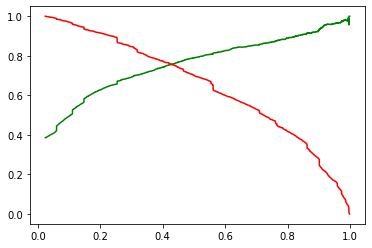

In [2508]:
# importing library to plot precision_recall curve

from sklearn.metrics import precision_recall_curve

# Getting precision as P and Recall as r and threshold value

p, r, thresholds = precision_recall_curve(y_train_pred_final_m6.Converted, y_train_pred_final_m6.Converted_Prob)

# Plotting the curve

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###### Model 7

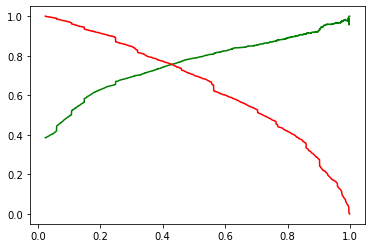

In [2509]:
# importing library to plot precision_recall curve

from sklearn.metrics import precision_recall_curve

# Getting precision as P and Recall as r and threshold value

p, r, thresholds = precision_recall_curve(y_train_pred_final_m7.Converted, y_train_pred_final_m7.Converted_Prob)

# Plotting the curve

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###### Model 8

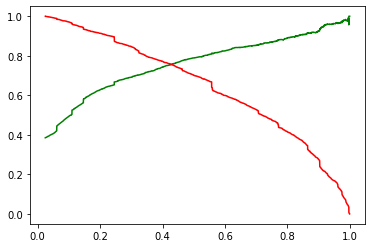

In [2510]:
# importing library to plot precision_recall curve

from sklearn.metrics import precision_recall_curve

# Getting precision as P and Recall as r and threshold value

p, r, thresholds = precision_recall_curve(y_train_pred_final_m8.Converted, y_train_pred_final_m8.Converted_Prob)

# Plotting the curve

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

For all Model 6, 7 and 8 - The curve is similar to specificity and sensitivity curve. Except now, the curve for precision is quite jumpy towards the end.

It is because, the denominator of precision i.e. TP+FP is not constant as these are predicted values of 1s and becuase the predicted values can swing badly, we get a jumpy curve.

### Making predictions on the test set

In [2511]:
# Scaling the variables 'TotalVisits', 'Total Time Spent on Website','Page Views Per Visit'

X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

###### Model 6

In [2512]:
# Selecting the final columns which were used in Train set final model
X_test = X_test[col_6]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Specialization_Missing,occupation_Others,occupation_Student,occupation_Unemployed,occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
4269,1.676166,0.964504,3.199297,0,0,0,0,1,0,0,0,0,0,0,1
2376,-1.095607,-0.885371,-1.233168,0,1,0,0,1,0,0,1,0,0,0,1
7766,0.636751,-0.777416,1.537122,0,0,1,0,0,0,0,0,1,0,0,0
9199,-1.095607,-0.885371,-1.233168,0,0,0,1,1,0,0,1,0,1,0,0
4359,-1.095607,-0.885371,-1.233168,0,1,0,0,0,0,0,1,0,0,0,0


In [2513]:
# Adding the constant variable
X_test_sm = sm.add_constant(X_test)

# Predicting the values using Model 6
y_test_pred = res6.predict(X_test_sm)
y_test_pred[:10]

4269    0.461590
2376    0.901850
7766    0.811210
9199    0.147372
4359    0.862361
9186    0.620487
1631    0.492091
8963    0.214694
8007    0.048917
5324    0.421498
dtype: float64

In [2514]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
4269,0.461590
2376,0.901850
7766,0.811210
9199,0.147372
4359,0.862361


In [2515]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [2516]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.461590
1,1,2376,0.901850
2,1,7766,0.811210
3,0,9199,0.147372
4,1,4359,0.862361


In [2517]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,4269,1,0.461590
1,2376,1,0.901850
2,7766,1,0.811210
3,9199,0,0.147372
4,4359,1,0.862361


In [2518]:
# Using the cut off received from plot accuracy sensitivity and specificity for various probabilities

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,4269,1,0.461590,1
1,2376,1,0.901850,1
2,7766,1,0.811210,1
3,9199,0,0.147372,0
4,4359,1,0.862361,1


<b> `Lead Score`</b>

In [2519]:
# Calculating Lead Score by Multiplying the Converted_Prob with 100
y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))

y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted,lead_score
0,4269,1,0.461590,1,46
1,2376,1,0.901850,1,90
2,7766,1,0.811210,1,81
3,9199,0,0.147372,0,15
4,4359,1,0.862361,1,86


In [2520]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),2)

0.81

In [2521]:
# Confusion Matrix

confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1354,  323],
       [ 208,  887]], dtype=int64)

In [2522]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

# Calculate false postive rate - predicting Converted when customer does not have Converted
print("\n"+start+"False Postive Rate : ",end = '')
print(round((FP/ float(TN+FP)),3))

# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ")
print(round(TP / float(TP+FN),2))

# Let us calculate specificity
print("Specificity : ")
print(round(TN / float(TN+FP),2))


False Postive Rate : 0.193
Sensitivity : 
0.81
Specificity : 
0.81


###### Model 7

In [2523]:
# Selecting the final columns which were used in Train set final model
X_test = X_test[col_7]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Specialization_Missing,occupation_Others,occupation_Student,occupation_Unemployed,occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
4269,1.676166,0.964504,3.199297,0,0,0,0,1,0,0,0,0,0,1
2376,-1.095607,-0.885371,-1.233168,0,1,0,0,1,0,0,1,0,0,1
7766,0.636751,-0.777416,1.537122,0,0,1,0,0,0,0,0,1,0,0
9199,-1.095607,-0.885371,-1.233168,0,0,0,1,1,0,0,1,0,1,0
4359,-1.095607,-0.885371,-1.233168,0,1,0,0,0,0,0,1,0,0,0


In [2524]:
# Adding the constant variable
X_test_sm = sm.add_constant(X_test)

# Predicting the values using Model 7
y_test_pred = res7.predict(X_test_sm)
y_test_pred[:10]

4269    0.461815
2376    0.902526
7766    0.807369
9199    0.148438
4359    0.859454
9186    0.622409
1631    0.485119
8963    0.208661
8007    0.049172
5324    0.423615
dtype: float64

In [2525]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
4269,0.461815
2376,0.902526
7766,0.807369
9199,0.148438
4359,0.859454


In [2526]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [2527]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.461815
1,1,2376,0.902526
2,1,7766,0.807369
3,0,9199,0.148438
4,1,4359,0.859454


In [2528]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,4269,1,0.461815
1,2376,1,0.902526
2,7766,1,0.807369
3,9199,0,0.148438
4,4359,1,0.859454


In [2529]:
# Using the cut off received from plot accuracy sensitivity and specificity for various probabilities

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,4269,1,0.461815,1
1,2376,1,0.902526,1
2,7766,1,0.807369,1
3,9199,0,0.148438,0
4,4359,1,0.859454,1


<b>`Lead Score`</b>

In [2530]:
# Calculating Lead Score by Multiplying the Converted_Prob with 100
y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))

y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted,lead_score
0,4269,1,0.461815,1,46
1,2376,1,0.902526,1,90
2,7766,1,0.807369,1,81
3,9199,0,0.148438,0,15
4,4359,1,0.859454,1,86


In [2531]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),2)

0.81

In [2532]:
# Confusion Matrix

confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1357,  320],
       [ 206,  889]], dtype=int64)

In [2533]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

# Calculate false postive rate - predicting Converted when customer does not have Converted
print("\n"+start+"False Postive Rate : ",end = '')
print(round((FP/ float(TN+FP)),3))

# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ")
print(round(TP / float(TP+FN),2))

# Let us calculate specificity
print("Specificity : ")
print(round(TN / float(TN+FP),2))


False Postive Rate : 0.191
Sensitivity : 
0.81
Specificity : 
0.81


###### Model 8

In [2534]:
# Selecting the final columns which were used in Train set final model
X_test = X_test[col_8]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Specialization_Missing,occupation_Student,occupation_Unemployed,occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
4269,1.676166,0.964504,3.199297,0,0,0,0,1,0,0,0,0,1
2376,-1.095607,-0.885371,-1.233168,0,1,0,0,1,0,1,0,0,1
7766,0.636751,-0.777416,1.537122,0,0,1,0,0,0,0,1,0,0
9199,-1.095607,-0.885371,-1.233168,0,0,0,1,1,0,1,0,1,0
4359,-1.095607,-0.885371,-1.233168,0,1,0,0,0,0,1,0,0,0


In [2535]:
# Adding the constant variable
X_test_sm = sm.add_constant(X_test)

# Predicting the values using Model 7
y_test_pred = res8.predict(X_test_sm)
y_test_pred[:10]

4269    0.471713
2376    0.903038
7766    0.810067
9199    0.146521
4359    0.864559
9186    0.620790
1631    0.485064
8963    0.206829
8007    0.051099
5324    0.421029
dtype: float64

In [2536]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
4269,0.471713
2376,0.903038
7766,0.810067
9199,0.146521
4359,0.864559


In [2537]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [2538]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.471713
1,1,2376,0.903038
2,1,7766,0.810067
3,0,9199,0.146521
4,1,4359,0.864559


In [2539]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,4269,1,0.471713
1,2376,1,0.903038
2,7766,1,0.810067
3,9199,0,0.146521
4,4359,1,0.864559


In [2540]:
# Using the cut off received from plot accuracy sensitivity and specificity for various probabilities

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,4269,1,0.471713,1
1,2376,1,0.903038,1
2,7766,1,0.810067,1
3,9199,0,0.146521,0
4,4359,1,0.864559,1


<b>`Lead Score`</b>

In [2541]:
# Calculating Lead Score by Multiplying the Converted_Prob with 100
y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))

y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted,lead_score
0,4269,1,0.471713,1,47
1,2376,1,0.903038,1,90
2,7766,1,0.810067,1,81
3,9199,0,0.146521,0,15
4,4359,1,0.864559,1,86


In [2542]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),2)

0.81

In [2543]:
# Confusion Matrix

confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1356,  321],
       [ 208,  887]], dtype=int64)

In [2544]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

# Calculate false postive rate - predicting Converted when customer does not have Converted
print("\n"+start+"False Postive Rate : ",end = '')
print(round((FP/ float(TN+FP)),3))

# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ")
print(round(TP / float(TP+FN),2))

# Let us calculate specificity
print("Specificity : ")
print(round(TN / float(TN+FP),2))


False Postive Rate : 0.191
Sensitivity : 
0.81
Specificity : 
0.81


For all Models 6, 7 and 8, the Sensitivity and Specificity are ideal in this cut off, i.e around same, we can say that 0.35 is the ideal cut off. If Sensitivity and Specificity were not same, we can change the cut off and build the model again and check.

### Summary

As we saw from above Prediction on Test Data, the target predicted using Model 6, 7 and 8 are giving very similar results while maintaining the sensitivity, specificity and accuracy for the cut off. All three metrics are coming aroud same for all three models.
<br>
Model 6 has :<br>
`Train Data Sensitivity : 0.846`<br>
`Optimal Cut off : 0.35`<br>
`Train Data Sensitivity for Optimal Cut off : 0.80`<br>
`Test Data Sensitivity : 0.81` 

Model 7 has :<br>
`Train Data Sensitivity : 0.848`<br>
`Optimal Cut off : 0.35`<br>
`Train Data Sensitivity for Optimal Cut off  : 0.797`<br>
`Test Data Sensitivity : 0.81` 

Model 8 has :<br>
`Train Data Sensitivity : 0.847`<br>
`Optimal Cut off : 0.35`<br>
`Train Data Sensitivity for Optimal Cut off  : 0.796`<br>
`Test Data Sensitivity : 0.81` 

Since, all of them are giving similar result, we will choose our Model depending on the Features in the final Model. If all Models are giving same results with different No. of features, we will select the Model with least No. of features.

Model 6 has 15 features, Model 7 has 14 features and Model 8 has 13 features. So, we will choose Model 8 as our final Model

###### Final Model :

<i>`Sensitivity :`</i> 0.81<br>
<i>`Accuracy :`</i> 0.81<br>
<i>`Specificity :`</i> 0.81<br>
<i>`Optimal Cut off :`</i> 0.35<br>

We have received same Sensitivity,Accuracy and Specificity as same value at cut off 0.35 while making sure that the sensitivity is >80%. Hence, the company's expectation to increase the conversion rate to around 80 % is achieved while keeping the Specificity and accuracy intact.

#### Recomendation : 

1. The variables `'TotalVisits'`, `'Total Time Spent on Website'`, `'Page Views Per Visit'`,`'Lead Origin_Landing Page Submission'`, `'Lead Origin_Others'`,`'Lead Source_Google'`, `'Lead Source_Olark Chat'`,`'Specialization_Missing'`, `'occupation_Student'`,`'occupation_Unemployed'`,`'occupation_Working Professional'`,`'Last Notable Activity_Modified'`,`'Last Notable Activity_SMS Sent'` are significant in predicting the conversion rate of the leads.
2. We can explain how well the selected variables describe the conversion rate by deriving the below Equation :

$ ConversionProb = 1/1+e^-(-1.3092 + (0.2415 \times TotalVisits) + (1.0605 \times Total Time Spent on Website) - (0.1905 \times Page Views Per Visit) - (0.9341 \times Lead Origin Landing Page Submission) + (3.1636 \times Lead Origin Others) + (0.3279 \times Lead Source Google) + (1.1621 \times Lead Source Olark Chat) - (0.9749 \times Specialization Missing) + (1.0295 \times occupation Student) + (0.9679 \times occupation Unemployed) + (3.3952 \times occupation Working Professional) - (0.6395 \times Last Notable Activity Modified) + (1.3527 \times Last Notable Activity SMS Sent)))  $

We can draw the below recomendations :
    
- Probability of Conversion is <b>increased by 0.2415 times for every one unit increase in TotalVisits</b>
- Probability of Conversion is <b>increased by 1.0605 times for every one unit increase in Total Time Spent on Website</b>
- Probability of Conversion is <b>decreased by -0.1905 times for every one unit increase in Page Views Per Visit</b>
- Probability of Conversion is <b>decreased by -0.9341 times for every one unit increase in Lead Origin_Landing Page Submission</b> 
- Probability of Conversion is <b>increased by 3.1636 times for every one unit increase in Lead Origin_Others</b>
- Probability of Conversion is <b>increased by 0.3279 times for every one unit increase in Lead Source_Google</b>
- Probability of Conversion is <b>increased by 1.1621 times for every one unit increase in Lead Source_Olark Chat</b> 
- Probability of Conversion is <b>decreased by -0.9749 times for every one unit increase in Specialization_Missing</b>
- Probability of Conversion is <b>increased by 1.0295 times for every one unit increase in occupation_Student</b>
- Probability of Conversion is <b>increased by 0.9679 times for every one unit increase in occupation_Unemployed</b>
- Probability of Conversion is <b>increased by 3.3952 times for every one unit increase in occupation_Working Professional</b>
- Probability of Conversion is <b>decreased by -0.6395 times for every one unit increase in Last Notable Activity_Modified</b>
- Probability of Conversion is <b>increased by 1.3527 times for every one unit increase in Last Notable Activity_SMS Sent</b>

### Solutions to problem presented by Company

#### Problem 1

- <b> X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.</b>

- Since X education wants to make phone calls to as much as possible to increase the lead conversion, we can basically tell that at this stage X education doesn’t mind having more false positives (FPs). So we can decrease our cutoff and predict the new probabilities based on the new cut off.
<br>
<br>
- In our model, the ideal cut off value was 0.35. When we ran our model on the test data, there were 1208 people who were predicted as 1s and 1564 people who were predicted as 0s.. (predicted value 1 means the probability of person getting converted in above the cut off value. 0 means the other way around.)

In [2545]:
# Reducing the cut off to increase the FPR

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.2 else 0)

# Calculating Lead Score by Multiplying the Converted_Prob with 100
y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))

y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted,lead_score
0,4269,1,0.471713,1,47
1,2376,1,0.903038,1,90
2,7766,1,0.810067,1,81
3,9199,0,0.146521,0,15
4,4359,1,0.864559,1,86


So, to increase the number of people who will be predicted as 1s to get the call, we are choosing a lower cut off value of 0.2. With cut off as 0.2, our model predicted 1561 people to be potential leads (predicted as 1) and 1211 people to be non-potential leads.

In [2546]:
y_pred_final.final_predicted.value_counts()

1    1561
0    1211
Name: final_predicted, dtype: int64

In [2547]:
# Confusion Matrix

confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1115,  562],
       [  96,  999]], dtype=int64)

In [2548]:
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives

# Calculate false postive rate - predicting Converted when customer does not have Converted
print("\n"+start+"False Postive Rate : ",end = '')
print(round((FP/ float(TN+FP)),3))


False Postive Rate : 0.335


When we decreased the cut off from 0.35 to 0.2, the potential lead count increased by 353. False positive rate increased to 0.335 from 0.191

If they want to further increase the count of potential leads, we can further decrease the cut off and predict the values

#### Problem 2

- <b> At times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.</b>


- In this case, since the company doesn’t want to make useless phone calls, it aims at reducing the number of false positives. That means they want to decrease the false positive rate. This can be achieved by increasing the cut off.
<br>
<br>
- As we saw in our model, the ideal cut off value was 0.35. When we ran our model on the test data, there were 1208 people who were predicted as 1s and 1564 people who were predicted as 0s. (predicted value 1 means the probability of person getting converted in above the cut off value. 0 means the other way around.)

To minimize the false positive rate, we are increasing the cut off to 0.5.

In [2553]:
# Increasing the cut off to decrease the FPR

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Calculating Lead Score by Multiplying the Converted_Prob with 100
y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))

y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted,lead_score
0,4269,1,0.471713,0,47
1,2376,1,0.903038,1,90
2,7766,1,0.810067,1,81
3,9199,0,0.146521,0,15
4,4359,1,0.864559,1,86


When we increased the cut off to 0.5, number of people predicted as potential leads decreased to 943. The number of non-potential leads increased to 1829. The count of potential leads decreased by 265.

In [2550]:
y_pred_final.final_predicted.value_counts()

0    1829
1     943
Name: final_predicted, dtype: int64

In [2551]:
# Confusion Matrix

confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1484,  193],
       [ 345,  750]], dtype=int64)

In [2552]:
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives

# Calculate false postive rate - predicting Converted when customer does not have Converted
print("\n"+start+"False Postive Rate : ",end = '')
print(round((FP/ float(TN+FP)),3))


False Postive Rate : 0.115


False positive rate decreases to 0.115 from 0.191.
<br>
If they want to further reduce the number of false positives, we can increase the cut off value and eliminate some more false positives there by decreasing the false positive rate.
